from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/ECA/')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-08 15:36:15.692125: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 15:36:16.311488: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-08 15:36:16.344098: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-08 15:36:16.344127: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
epochs = 50

In [3]:
df = pd.read_csv("data/LocationB.csv")

df.drop(columns=["Unnamed: 0", "Date"], inplace=True)

WINDOW_SIZE = 3
ECB = df["ECB"]

X1, y1 = df_to_X_y(ECB, WINDOW_SIZE)
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# General Model

### CNN

2024-03-08 15:36:24.925499: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-08 15:36:24.925553: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-08 15:36:24.925585: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-08 15:36:24.926142: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
1/8 [==>...........................] - ETA: 11s - loss: 2134337.5000 - root_mean_squared_error: 1460.9373

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 502ms/step - loss: 2127216.7500 - root_mean_squared_error: 1458.4982 - val_loss: 2030282.2500 - val_root_mean_squared_error: 1424.8798
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 1904148.3750 - root_mean_squared_error: 1379.9088

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 451ms/step - loss: 1998798.1250 - root_mean_squared_error: 1413.7886 - val_loss: 1897307.5000 - val_root_mean_squared_error: 1377.4279
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 1831673.3750 - root_mean_squared_error: 1353.3933

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 428ms/step - loss: 1859950.5000 - root_mean_squared_error: 1363.8000 - val_loss: 1755093.5000 - val_root_mean_squared_error: 1324.7994
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 1811393.7500 - root_mean_squared_error: 1345.8802

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 317ms/step - loss: 1719245.8750 - root_mean_squared_error: 1311.2002 - val_loss: 1616339.0000 - val_root_mean_squared_error: 1271.3533
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 1583998.7500 - root_mean_squared_error: 1258.5701

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 409ms/step - loss: 1581824.0000 - root_mean_squared_error: 1257.7058 - val_loss: 1483566.1250 - val_root_mean_squared_error: 1218.0173
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 1546380.1250 - root_mean_squared_error: 1243.5353

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 643ms/step - loss: 1450919.1250 - root_mean_squared_error: 1204.5410 - val_loss: 1359519.7500 - val_root_mean_squared_error: 1165.9845
Epoch 7/50
5/8 [=================>............] - ETA: 0s - loss: 1357769.6250 - root_mean_squared_error: 1165.2338

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 364ms/step - loss: 1328726.8750 - root_mean_squared_error: 1152.7041 - val_loss: 1242403.8750 - val_root_mean_squared_error: 1114.6317
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 1230463.7500 - root_mean_squared_error: 1109.2627

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 333ms/step - loss: 1214344.6250 - root_mean_squared_error: 1101.9730 - val_loss: 1133574.0000 - val_root_mean_squared_error: 1064.6942
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 1048722.0000 - root_mean_squared_error: 1024.0713

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 239ms/step - loss: 1105793.2500 - root_mean_squared_error: 1051.5670 - val_loss: 1032485.3125 - val_root_mean_squared_error: 1016.1129
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 1141202.8750 - root_mean_squared_error: 1068.2710

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 294ms/step - loss: 1006875.8750 - root_mean_squared_error: 1003.4321 - val_loss: 936266.3750 - val_root_mean_squared_error: 967.6086
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 980682.0000 - root_mean_squared_error: 990.2939

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 242ms/step - loss: 911920.0000 - root_mean_squared_error: 954.9450 - val_loss: 847113.3125 - val_root_mean_squared_error: 920.3876
Epoch 12/50
1/8 [==>...........................] - ETA: 0s - loss: 942640.8750 - root_mean_squared_error: 970.8970

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 296ms/step - loss: 825573.7500 - root_mean_squared_error: 908.6109 - val_loss: 764436.0000 - val_root_mean_squared_error: 874.3203
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 762335.6250 - root_mean_squared_error: 873.1183

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 321ms/step - loss: 744594.0000 - root_mean_squared_error: 862.8986 - val_loss: 688202.6875 - val_root_mean_squared_error: 829.5798
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 679835.8125 - root_mean_squared_error: 824.5215

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 248ms/step - loss: 668810.0625 - root_mean_squared_error: 817.8081 - val_loss: 617441.1875 - val_root_mean_squared_error: 785.7742
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 611507.5625 - root_mean_squared_error: 781.9895

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 294ms/step - loss: 599098.1250 - root_mean_squared_error: 774.0143 - val_loss: 550969.5000 - val_root_mean_squared_error: 742.2732
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 512646.3125 - root_mean_squared_error: 715.9932

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 238ms/step - loss: 533924.8750 - root_mean_squared_error: 730.7017 - val_loss: 489572.7500 - val_root_mean_squared_error: 699.6948
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 464234.9375 - root_mean_squared_error: 681.3479

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 189ms/step - loss: 473977.0000 - root_mean_squared_error: 688.4599 - val_loss: 433798.2188 - val_root_mean_squared_error: 658.6336
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 419394.5938 - root_mean_squared_error: 647.6068

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 249ms/step - loss: 419756.0312 - root_mean_squared_error: 647.8858 - val_loss: 382539.0312 - val_root_mean_squared_error: 618.4974
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 349207.2500 - root_mean_squared_error: 590.9376

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 274ms/step - loss: 370338.7500 - root_mean_squared_error: 608.5546 - val_loss: 336175.8750 - val_root_mean_squared_error: 579.8068
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 333524.4688 - root_mean_squared_error: 577.5157

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 283ms/step - loss: 325424.0312 - root_mean_squared_error: 570.4595 - val_loss: 294321.6562 - val_root_mean_squared_error: 542.5142
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 319367.0312 - root_mean_squared_error: 565.1257

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 438ms/step - loss: 284771.8438 - root_mean_squared_error: 533.6402 - val_loss: 256339.2344 - val_root_mean_squared_error: 506.2996
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 270791.6250 - root_mean_squared_error: 520.3764

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 297ms/step - loss: 247785.9375 - root_mean_squared_error: 497.7810 - val_loss: 222130.7188 - val_root_mean_squared_error: 471.3075
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 218799.6250 - root_mean_squared_error: 467.7602

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 347ms/step - loss: 214708.2500 - root_mean_squared_error: 463.3662 - val_loss: 191766.4531 - val_root_mean_squared_error: 437.9115
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 192657.4219 - root_mean_squared_error: 438.9276

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 304ms/step - loss: 185503.8594 - root_mean_squared_error: 430.7016 - val_loss: 164628.7188 - val_root_mean_squared_error: 405.7447
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 159285.5938 - root_mean_squared_error: 399.1060

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 344ms/step - loss: 159285.5938 - root_mean_squared_error: 399.1060 - val_loss: 140746.5156 - val_root_mean_squared_error: 375.1620
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 133156.7344 - root_mean_squared_error: 364.9065

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 259ms/step - loss: 136055.8594 - root_mean_squared_error: 368.8575 - val_loss: 119549.9297 - val_root_mean_squared_error: 345.7599
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 115954.8516 - root_mean_squared_error: 340.5215

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 337ms/step - loss: 115954.8516 - root_mean_squared_error: 340.5215 - val_loss: 101119.4688 - val_root_mean_squared_error: 317.9929
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 98713.4688 - root_mean_squared_error: 314.1870

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 246ms/step - loss: 98181.6094 - root_mean_squared_error: 313.3394 - val_loss: 85298.1562 - val_root_mean_squared_error: 292.0585
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 92326.4844 - root_mean_squared_error: 303.8527

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 244ms/step - loss: 83131.1016 - root_mean_squared_error: 288.3246 - val_loss: 71530.7578 - val_root_mean_squared_error: 267.4524
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 70194.0234 - root_mean_squared_error: 264.9416

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 330ms/step - loss: 69939.4375 - root_mean_squared_error: 264.4607 - val_loss: 59682.0781 - val_root_mean_squared_error: 244.2992
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 50321.3906 - root_mean_squared_error: 224.3243

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 337ms/step - loss: 58547.3477 - root_mean_squared_error: 241.9656 - val_loss: 49681.5703 - val_root_mean_squared_error: 222.8936
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 47302.8281 - root_mean_squared_error: 217.4921

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 536ms/step - loss: 49084.4258 - root_mean_squared_error: 221.5500 - val_loss: 41223.0586 - val_root_mean_squared_error: 203.0346
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 35136.6328 - root_mean_squared_error: 187.4477

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 310ms/step - loss: 41130.1758 - root_mean_squared_error: 202.8058 - val_loss: 34162.8711 - val_root_mean_squared_error: 184.8320
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 43896.2031 - root_mean_squared_error: 209.5142

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 378ms/step - loss: 34583.5625 - root_mean_squared_error: 185.9666 - val_loss: 28225.0176 - val_root_mean_squared_error: 168.0030
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 29508.8770 - root_mean_squared_error: 171.7815

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 297ms/step - loss: 28971.5449 - root_mean_squared_error: 170.2103 - val_loss: 23308.0371 - val_root_mean_squared_error: 152.6697
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 29134.0332 - root_mean_squared_error: 170.6870

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 269ms/step - loss: 24396.9531 - root_mean_squared_error: 156.1952 - val_loss: 19254.7637 - val_root_mean_squared_error: 138.7615
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 20476.0645 - root_mean_squared_error: 143.0946

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 251ms/step - loss: 20562.1172 - root_mean_squared_error: 143.3950 - val_loss: 15941.5996 - val_root_mean_squared_error: 126.2600
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 17389.5352 - root_mean_squared_error: 131.8694

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 262ms/step - loss: 17445.9160 - root_mean_squared_error: 132.0830 - val_loss: 13225.0283 - val_root_mean_squared_error: 115.0001
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 14857.2490 - root_mean_squared_error: 121.8903

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 333ms/step - loss: 14930.0400 - root_mean_squared_error: 122.1885 - val_loss: 11097.9512 - val_root_mean_squared_error: 105.3468
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 14563.9453 - root_mean_squared_error: 120.6812

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 287ms/step - loss: 12968.2012 - root_mean_squared_error: 113.8780 - val_loss: 9381.8506 - val_root_mean_squared_error: 96.8600
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 11582.1055 - root_mean_squared_error: 107.6202

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 272ms/step - loss: 11385.4961 - root_mean_squared_error: 106.7028 - val_loss: 8040.0151 - val_root_mean_squared_error: 89.6661
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 13032.1016 - root_mean_squared_error: 114.1582

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 264ms/step - loss: 10157.5840 - root_mean_squared_error: 100.7848 - val_loss: 6957.3267 - val_root_mean_squared_error: 83.4106
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 9124.2832 - root_mean_squared_error: 95.5211

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 242ms/step - loss: 9124.2832 - root_mean_squared_error: 95.5211 - val_loss: 6155.5972 - val_root_mean_squared_error: 78.4576
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 16561.7363 - root_mean_squared_error: 128.6924

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 318ms/step - loss: 8403.7812 - root_mean_squared_error: 91.6721 - val_loss: 5516.3296 - val_root_mean_squared_error: 74.2720
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 6153.2739 - root_mean_squared_error: 78.4428

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 351ms/step - loss: 7823.2568 - root_mean_squared_error: 88.4492 - val_loss: 5039.6357 - val_root_mean_squared_error: 70.9904
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 6863.0010 - root_mean_squared_error: 82.8432

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 270ms/step - loss: 7372.0684 - root_mean_squared_error: 85.8607 - val_loss: 4676.8784 - val_root_mean_squared_error: 68.3877
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 10670.1641 - root_mean_squared_error: 103.2965

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 335ms/step - loss: 7030.2886 - root_mean_squared_error: 83.8468 - val_loss: 4363.8496 - val_root_mean_squared_error: 66.0594
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 6085.1968 - root_mean_squared_error: 78.0077

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 435ms/step - loss: 6741.8247 - root_mean_squared_error: 82.1086 - val_loss: 4129.2964 - val_root_mean_squared_error: 64.2596
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 6682.5312 - root_mean_squared_error: 81.7467

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 410ms/step - loss: 6542.9893 - root_mean_squared_error: 80.8887 - val_loss: 3951.5051 - val_root_mean_squared_error: 62.8610
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 11282.0693 - root_mean_squared_error: 106.2171

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 5ms/step


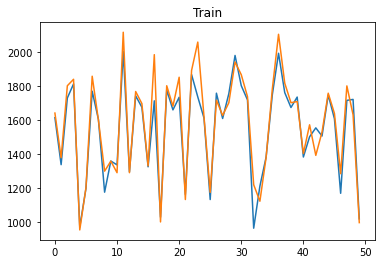

2/2 [==============================] - 0s 6ms/step


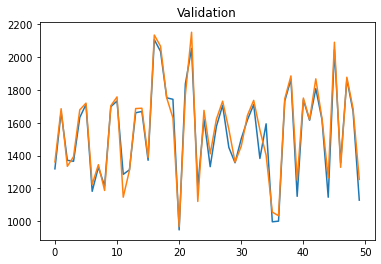

3/3 [==============================] - 0s 4ms/step


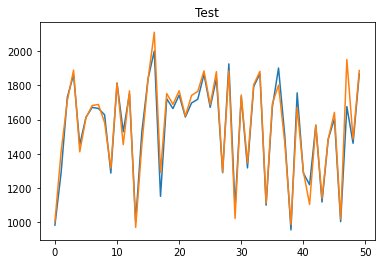

3/3 [==============================] - 0s 10ms/step


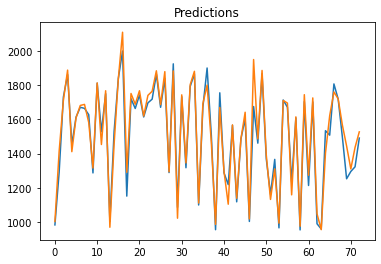

In [4]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 2549466.2500 - root_mean_squared_error: 1596.7048

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 2s/step - loss: 2530372.7500 - root_mean_squared_error: 1590.7146 - val_loss: 2504160.2500 - val_root_mean_squared_error: 1582.4539
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2530283.0000 - root_mean_squared_error: 1590.6863

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2530283.0000 - root_mean_squared_error: 1590.6863 - val_loss: 2504074.5000 - val_root_mean_squared_error: 1582.4268
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 2564224.7500 - root_mean_squared_error: 1601.3197

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2530197.5000 - root_mean_squared_error: 1590.6594 - val_loss: 2503989.2500 - val_root_mean_squared_error: 1582.3998
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 2964167.2500 - root_mean_squared_error: 1721.6757

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2530112.5000 - root_mean_squared_error: 1590.6327 - val_loss: 2503904.5000 - val_root_mean_squared_error: 1582.3730
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2538301.7500 - root_mean_squared_error: 1593.2048

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2530027.7500 - root_mean_squared_error: 1590.6061 - val_loss: 2503819.0000 - val_root_mean_squared_error: 1582.3459
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 2419928.5000 - root_mean_squared_error: 1555.6119

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2529940.7500 - root_mean_squared_error: 1590.5787 - val_loss: 2503725.7500 - val_root_mean_squared_error: 1582.3165
Epoch 7/50
5/8 [=================>............] - ETA: 0s - loss: 2529529.5000 - root_mean_squared_error: 1590.4495

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2529819.5000 - root_mean_squared_error: 1590.5406 - val_loss: 2503480.2500 - val_root_mean_squared_error: 1582.2390
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2539133.7500 - root_mean_squared_error: 1593.4659

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2529376.5000 - root_mean_squared_error: 1590.4014 - val_loss: 2502891.0000 - val_root_mean_squared_error: 1582.0527
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2538175.2500 - root_mean_squared_error: 1593.1652

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2528981.0000 - root_mean_squared_error: 1590.2770 - val_loss: 2502753.0000 - val_root_mean_squared_error: 1582.0092
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 2249270.0000 - root_mean_squared_error: 1499.7566

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2528853.2500 - root_mean_squared_error: 1590.2368 - val_loss: 2502536.5000 - val_root_mean_squared_error: 1581.9408
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 2545173.2500 - root_mean_squared_error: 1595.3599

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2528487.0000 - root_mean_squared_error: 1590.1217 - val_loss: 2502046.2500 - val_root_mean_squared_error: 1581.7858
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2516741.2500 - root_mean_squared_error: 1586.4241

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2528116.2500 - root_mean_squared_error: 1590.0051 - val_loss: 2501867.0000 - val_root_mean_squared_error: 1581.7291
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 2593783.0000 - root_mean_squared_error: 1610.5226

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2527982.0000 - root_mean_squared_error: 1589.9629 - val_loss: 2501760.5000 - val_root_mean_squared_error: 1581.6954
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2526398.2500 - root_mean_squared_error: 1589.4647

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2527862.0000 - root_mean_squared_error: 1589.9252 - val_loss: 2501583.0000 - val_root_mean_squared_error: 1581.6393
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 2589921.5000 - root_mean_squared_error: 1609.3234

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2527629.2500 - root_mean_squared_error: 1589.8519 - val_loss: 2501350.0000 - val_root_mean_squared_error: 1581.5657
Epoch 16/50
5/8 [=================>............] - ETA: 0s - loss: 2499322.2500 - root_mean_squared_error: 1580.9244

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2527469.2500 - root_mean_squared_error: 1589.8016 - val_loss: 2501257.7500 - val_root_mean_squared_error: 1581.5365
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2527380.0000 - root_mean_squared_error: 1589.7736

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2527380.0000 - root_mean_squared_error: 1589.7736 - val_loss: 2501169.7500 - val_root_mean_squared_error: 1581.5087
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 3003264.0000 - root_mean_squared_error: 1732.9928

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2527292.0000 - root_mean_squared_error: 1589.7458 - val_loss: 2501082.2500 - val_root_mean_squared_error: 1581.4811
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 2534189.5000 - root_mean_squared_error: 1591.9138

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2527204.5000 - root_mean_squared_error: 1589.7184 - val_loss: 2500995.2500 - val_root_mean_squared_error: 1581.4535
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 2626993.5000 - root_mean_squared_error: 1620.8003

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2527117.2500 - root_mean_squared_error: 1589.6909 - val_loss: 2500908.5000 - val_root_mean_squared_error: 1581.4261
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2527030.7500 - root_mean_squared_error: 1589.6637

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2527030.7500 - root_mean_squared_error: 1589.6637 - val_loss: 2500821.2500 - val_root_mean_squared_error: 1581.3986
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 2582693.0000 - root_mean_squared_error: 1607.0759

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2526943.2500 - root_mean_squared_error: 1589.6362 - val_loss: 2500735.0000 - val_root_mean_squared_error: 1581.3712
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2532434.2500 - root_mean_squared_error: 1591.3624

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2526856.7500 - root_mean_squared_error: 1589.6090 - val_loss: 2500648.0000 - val_root_mean_squared_error: 1581.3438
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 2584789.0000 - root_mean_squared_error: 1607.7279

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2526770.2500 - root_mean_squared_error: 1589.5818 - val_loss: 2500561.7500 - val_root_mean_squared_error: 1581.3164
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 2280501.5000 - root_mean_squared_error: 1510.1329

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2526684.0000 - root_mean_squared_error: 1589.5547 - val_loss: 2500475.5000 - val_root_mean_squared_error: 1581.2891
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2520499.2500 - root_mean_squared_error: 1587.6080

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2526597.7500 - root_mean_squared_error: 1589.5275 - val_loss: 2500389.5000 - val_root_mean_squared_error: 1581.2620
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 2526660.7500 - root_mean_squared_error: 1589.5474

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2526511.7500 - root_mean_squared_error: 1589.5005 - val_loss: 2500303.2500 - val_root_mean_squared_error: 1581.2349
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 2511992.0000 - root_mean_squared_error: 1584.9265

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2526425.7500 - root_mean_squared_error: 1589.4734 - val_loss: 2500217.0000 - val_root_mean_squared_error: 1581.2076
Epoch 29/50
4/8 [==============>...............] - ETA: 0s - loss: 2454295.0000 - root_mean_squared_error: 1566.6190

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2526339.2500 - root_mean_squared_error: 1589.4462 - val_loss: 2500131.0000 - val_root_mean_squared_error: 1581.1803
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 2643565.2500 - root_mean_squared_error: 1625.9044

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2526253.7500 - root_mean_squared_error: 1589.4193 - val_loss: 2500045.0000 - val_root_mean_squared_error: 1581.1531
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2797456.0000 - root_mean_squared_error: 1672.5597

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2526167.5000 - root_mean_squared_error: 1589.3922 - val_loss: 2499959.5000 - val_root_mean_squared_error: 1581.1260
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 2482428.5000 - root_mean_squared_error: 1575.5724

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2526082.2500 - root_mean_squared_error: 1589.3654 - val_loss: 2499874.0000 - val_root_mean_squared_error: 1581.0990
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 2606910.0000 - root_mean_squared_error: 1614.5928

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2525997.0000 - root_mean_squared_error: 1589.3385 - val_loss: 2499788.7500 - val_root_mean_squared_error: 1581.0720
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2525910.7500 - root_mean_squared_error: 1589.3114

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2525910.7500 - root_mean_squared_error: 1589.3114 - val_loss: 2499704.0000 - val_root_mean_squared_error: 1581.0452
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 2575393.5000 - root_mean_squared_error: 1604.8032

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2525826.2500 - root_mean_squared_error: 1589.2848 - val_loss: 2499618.2500 - val_root_mean_squared_error: 1581.0181
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 2307931.0000 - root_mean_squared_error: 1519.1876

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 7s 964ms/step - loss: 2525740.5000 - root_mean_squared_error: 1589.2578 - val_loss: 2499533.0000 - val_root_mean_squared_error: 1580.9911
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2332412.5000 - root_mean_squared_error: 1527.2238

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2525655.0000 - root_mean_squared_error: 1589.2310 - val_loss: 2499447.5000 - val_root_mean_squared_error: 1580.9641
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2534821.2500 - root_mean_squared_error: 1592.1122

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2525570.2500 - root_mean_squared_error: 1589.2042 - val_loss: 2499361.7500 - val_root_mean_squared_error: 1580.9370
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 2473526.5000 - root_mean_squared_error: 1572.7449

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 7s 1s/step - loss: 2525484.2500 - root_mean_squared_error: 1589.1772 - val_loss: 2499276.5000 - val_root_mean_squared_error: 1580.9100
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 2280088.0000 - root_mean_squared_error: 1509.9960

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2525399.0000 - root_mean_squared_error: 1589.1504 - val_loss: 2499191.2500 - val_root_mean_squared_error: 1580.8831
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2525313.7500 - root_mean_squared_error: 1589.1235

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 7s 1s/step - loss: 2525313.7500 - root_mean_squared_error: 1589.1235 - val_loss: 2499105.7500 - val_root_mean_squared_error: 1580.8561
Epoch 42/50
3/8 [==========>...................] - ETA: 0s - loss: 2446936.0000 - root_mean_squared_error: 1564.2686

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2525228.0000 - root_mean_squared_error: 1589.0966 - val_loss: 2499021.2500 - val_root_mean_squared_error: 1580.8293
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2525143.7500 - root_mean_squared_error: 1589.0701

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2525143.7500 - root_mean_squared_error: 1589.0701 - val_loss: 2498936.0000 - val_root_mean_squared_error: 1580.8024
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 2612019.5000 - root_mean_squared_error: 1616.1743

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2525058.5000 - root_mean_squared_error: 1589.0432 - val_loss: 2498851.5000 - val_root_mean_squared_error: 1580.7756
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2524974.2500 - root_mean_squared_error: 1589.0167

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2524974.2500 - root_mean_squared_error: 1589.0167 - val_loss: 2498767.2500 - val_root_mean_squared_error: 1580.7489
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2524889.2500 - root_mean_squared_error: 1588.9900

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2524889.2500 - root_mean_squared_error: 1588.9900 - val_loss: 2498682.5000 - val_root_mean_squared_error: 1580.7222
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2524804.2500 - root_mean_squared_error: 1588.9633

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2524804.2500 - root_mean_squared_error: 1588.9633 - val_loss: 2498597.2500 - val_root_mean_squared_error: 1580.6952
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 2452236.7500 - root_mean_squared_error: 1565.9619

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2524719.5000 - root_mean_squared_error: 1588.9366 - val_loss: 2498511.0000 - val_root_mean_squared_error: 1580.6678
Epoch 49/50
4/8 [==============>...............] - ETA: 0s - loss: 2545483.2500 - root_mean_squared_error: 1595.4570

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2524632.7500 - root_mean_squared_error: 1588.9093 - val_loss: 2498425.0000 - val_root_mean_squared_error: 1580.6407
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2545329.2500 - root_mean_squared_error: 1595.4088

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 2s 5ms/step


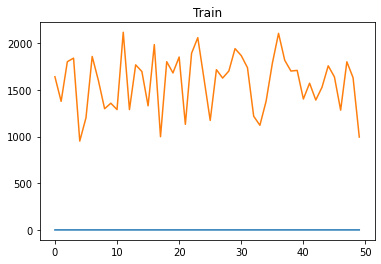

2/2 [==============================] - 1s 4ms/step


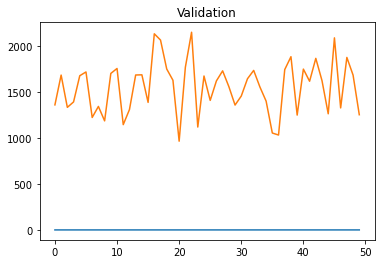

3/3 [==============================] - 0s 21ms/step


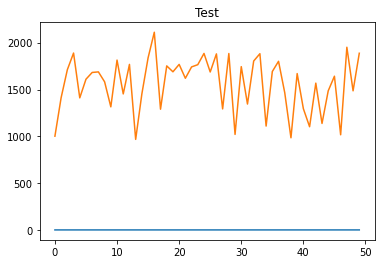

3/3 [==============================] - 0s 3ms/step


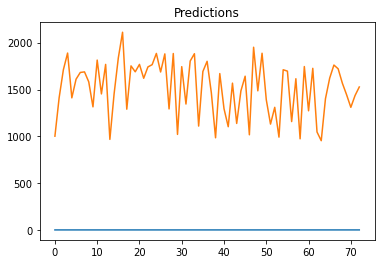

In [5]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 2564166.7500 - root_mean_squared_error: 1601.3016 

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 2s/step - loss: 2530923.2500 - root_mean_squared_error: 1590.8876 - val_loss: 2504717.2500 - val_root_mean_squared_error: 1582.6299
Epoch 2/50
4/8 [==============>...............] - ETA: 0s - loss: 2551315.7500 - root_mean_squared_error: 1597.2838

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2530849.0000 - root_mean_squared_error: 1590.8643 - val_loss: 2504656.2500 - val_root_mean_squared_error: 1582.6106
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2548846.0000 - root_mean_squared_error: 1596.5106

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2530787.2500 - root_mean_squared_error: 1590.8448 - val_loss: 2504583.2500 - val_root_mean_squared_error: 1582.5875
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2532577.7500 - root_mean_squared_error: 1591.4075

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2530696.2500 - root_mean_squared_error: 1590.8162 - val_loss: 2504458.2500 - val_root_mean_squared_error: 1582.5480
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 2484322.0000 - root_mean_squared_error: 1576.1732

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2530525.2500 - root_mean_squared_error: 1590.7625 - val_loss: 2504244.5000 - val_root_mean_squared_error: 1582.4805
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2547846.2500 - root_mean_squared_error: 1596.1974

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2530363.0000 - root_mean_squared_error: 1590.7114 - val_loss: 2504154.7500 - val_root_mean_squared_error: 1582.4521
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2530282.0000 - root_mean_squared_error: 1590.6860

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2530282.0000 - root_mean_squared_error: 1590.6860 - val_loss: 2504083.5000 - val_root_mean_squared_error: 1582.4296
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2515855.5000 - root_mean_squared_error: 1586.1449

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2530211.2500 - root_mean_squared_error: 1590.6638 - val_loss: 2503999.0000 - val_root_mean_squared_error: 1582.4030
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2530091.5000 - root_mean_squared_error: 1590.6261

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2530091.5000 - root_mean_squared_error: 1590.6261 - val_loss: 2503800.0000 - val_root_mean_squared_error: 1582.3401
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2519852.2500 - root_mean_squared_error: 1587.4043

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2529874.5000 - root_mean_squared_error: 1590.5579 - val_loss: 2503632.5000 - val_root_mean_squared_error: 1582.2871
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 2517392.2500 - root_mean_squared_error: 1586.6292

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2529759.7500 - root_mean_squared_error: 1590.5219 - val_loss: 2503565.5000 - val_root_mean_squared_error: 1582.2660
Epoch 12/50
5/8 [=================>............] - ETA: 0s - loss: 2514209.5000 - root_mean_squared_error: 1585.6259

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2529699.7500 - root_mean_squared_error: 1590.5029 - val_loss: 2503506.7500 - val_root_mean_squared_error: 1582.2473
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 2499888.0000 - root_mean_squared_error: 1581.1034

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2529630.2500 - root_mean_squared_error: 1590.4811 - val_loss: 2503405.2500 - val_root_mean_squared_error: 1582.2153
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2533036.5000 - root_mean_squared_error: 1591.5516

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2529518.7500 - root_mean_squared_error: 1590.4460 - val_loss: 2503314.7500 - val_root_mean_squared_error: 1582.1866
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 2498562.7500 - root_mean_squared_error: 1580.6843

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2529449.2500 - root_mean_squared_error: 1590.4242 - val_loss: 2503261.2500 - val_root_mean_squared_error: 1582.1698
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2529398.2500 - root_mean_squared_error: 1590.4082

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 2529398.2500 - root_mean_squared_error: 1590.4082 - val_loss: 2503211.2500 - val_root_mean_squared_error: 1582.1539
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 2621125.0000 - root_mean_squared_error: 1618.9889

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2529348.5000 - root_mean_squared_error: 1590.3926 - val_loss: 2503161.7500 - val_root_mean_squared_error: 1582.1383
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 2542228.2500 - root_mean_squared_error: 1594.4366

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2529299.0000 - root_mean_squared_error: 1590.3770 - val_loss: 2503112.2500 - val_root_mean_squared_error: 1582.1227
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 2541774.2500 - root_mean_squared_error: 1594.2943

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2529249.5000 - root_mean_squared_error: 1590.3615 - val_loss: 2503062.5000 - val_root_mean_squared_error: 1582.1069
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 2283130.5000 - root_mean_squared_error: 1511.0032

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2529199.7500 - root_mean_squared_error: 1590.3458 - val_loss: 2503012.7500 - val_root_mean_squared_error: 1582.0913
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 2259398.7500 - root_mean_squared_error: 1503.1296

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2529149.5000 - root_mean_squared_error: 1590.3300 - val_loss: 2502963.0000 - val_root_mean_squared_error: 1582.0756
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 2636199.0000 - root_mean_squared_error: 1623.6376

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2529100.2500 - root_mean_squared_error: 1590.3145 - val_loss: 2502914.7500 - val_root_mean_squared_error: 1582.0603
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 2555608.5000 - root_mean_squared_error: 1598.6271

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2529052.0000 - root_mean_squared_error: 1590.2993 - val_loss: 2502863.5000 - val_root_mean_squared_error: 1582.0441
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 2405672.5000 - root_mean_squared_error: 1551.0231

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2528990.7500 - root_mean_squared_error: 1590.2800 - val_loss: 2502761.7500 - val_root_mean_squared_error: 1582.0120
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2501454.0000 - root_mean_squared_error: 1581.5985

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2528894.2500 - root_mean_squared_error: 1590.2498 - val_loss: 2502690.7500 - val_root_mean_squared_error: 1581.9895
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 2921018.0000 - root_mean_squared_error: 1709.0986

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2528822.7500 - root_mean_squared_error: 1590.2273 - val_loss: 2502620.5000 - val_root_mean_squared_error: 1581.9674
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2346153.7500 - root_mean_squared_error: 1531.7159

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2528736.5000 - root_mean_squared_error: 1590.2002 - val_loss: 2502520.2500 - val_root_mean_squared_error: 1581.9355
Epoch 28/50
5/8 [=================>............] - ETA: 0s - loss: 2559171.5000 - root_mean_squared_error: 1599.7411

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2528653.5000 - root_mean_squared_error: 1590.1741 - val_loss: 2502448.2500 - val_root_mean_squared_error: 1581.9127
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2524507.5000 - root_mean_squared_error: 1588.8699

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2528580.2500 - root_mean_squared_error: 1590.1510 - val_loss: 2502384.0000 - val_root_mean_squared_error: 1581.8926
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 2531758.0000 - root_mean_squared_error: 1591.1499

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2528511.7500 - root_mean_squared_error: 1590.1295 - val_loss: 2502313.5000 - val_root_mean_squared_error: 1581.8704
Epoch 31/50
5/8 [=================>............] - ETA: 0s - loss: 2504188.5000 - root_mean_squared_error: 1582.4628

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2528444.7500 - root_mean_squared_error: 1590.1084 - val_loss: 2502247.5000 - val_root_mean_squared_error: 1581.8495
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2528132.2500 - root_mean_squared_error: 1590.0101

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2528378.5000 - root_mean_squared_error: 1590.0875 - val_loss: 2502180.7500 - val_root_mean_squared_error: 1581.8282
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2523222.0000 - root_mean_squared_error: 1588.4653

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2528310.5000 - root_mean_squared_error: 1590.0662 - val_loss: 2502112.0000 - val_root_mean_squared_error: 1581.8065
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 2485845.2500 - root_mean_squared_error: 1576.6564

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2528243.0000 - root_mean_squared_error: 1590.0449 - val_loss: 2502047.0000 - val_root_mean_squared_error: 1581.7860
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2528178.5000 - root_mean_squared_error: 1590.0247

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2528178.5000 - root_mean_squared_error: 1590.0247 - val_loss: 2501985.0000 - val_root_mean_squared_error: 1581.7664
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2528117.5000 - root_mean_squared_error: 1590.0055

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2528117.5000 - root_mean_squared_error: 1590.0055 - val_loss: 2501925.5000 - val_root_mean_squared_error: 1581.7476
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2336429.2500 - root_mean_squared_error: 1528.5383

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2528058.7500 - root_mean_squared_error: 1589.9871 - val_loss: 2501867.5000 - val_root_mean_squared_error: 1581.7292
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2515110.2500 - root_mean_squared_error: 1585.9099

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2528000.7500 - root_mean_squared_error: 1589.9688 - val_loss: 2501810.5000 - val_root_mean_squared_error: 1581.7113
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2527943.7500 - root_mean_squared_error: 1589.9508

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2527943.7500 - root_mean_squared_error: 1589.9508 - val_loss: 2501752.5000 - val_root_mean_squared_error: 1581.6930
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 2469816.5000 - root_mean_squared_error: 1571.5649

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2527886.5000 - root_mean_squared_error: 1589.9329 - val_loss: 2501695.0000 - val_root_mean_squared_error: 1581.6748
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 2433836.0000 - root_mean_squared_error: 1560.0757

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2527828.2500 - root_mean_squared_error: 1589.9146 - val_loss: 2501637.2500 - val_root_mean_squared_error: 1581.6565
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2527770.2500 - root_mean_squared_error: 1589.8964

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2527770.2500 - root_mean_squared_error: 1589.8964 - val_loss: 2501579.0000 - val_root_mean_squared_error: 1581.6381
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2388544.5000 - root_mean_squared_error: 1545.4917

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2527712.2500 - root_mean_squared_error: 1589.8781 - val_loss: 2501520.5000 - val_root_mean_squared_error: 1581.6196
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 2387129.7500 - root_mean_squared_error: 1545.0339

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2527653.7500 - root_mean_squared_error: 1589.8596 - val_loss: 2501462.0000 - val_root_mean_squared_error: 1581.6011
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 2470407.5000 - root_mean_squared_error: 1571.7531

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2527595.2500 - root_mean_squared_error: 1589.8413 - val_loss: 2501403.2500 - val_root_mean_squared_error: 1581.5825
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2527536.2500 - root_mean_squared_error: 1589.8228

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2527536.2500 - root_mean_squared_error: 1589.8228 - val_loss: 2501344.2500 - val_root_mean_squared_error: 1581.5638
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 2713894.2500 - root_mean_squared_error: 1647.3901

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2527477.0000 - root_mean_squared_error: 1589.8041 - val_loss: 2501285.0000 - val_root_mean_squared_error: 1581.5452
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2527417.2500 - root_mean_squared_error: 1589.7853

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2527417.2500 - root_mean_squared_error: 1589.7853 - val_loss: 2501225.0000 - val_root_mean_squared_error: 1581.5261
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2881262.0000 - root_mean_squared_error: 1697.4281

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2527357.2500 - root_mean_squared_error: 1589.7664 - val_loss: 2501163.0000 - val_root_mean_squared_error: 1581.5066
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2527288.5000 - root_mean_squared_error: 1589.7448

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 2s 3ms/step


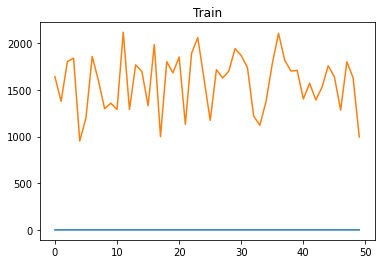

2/2 [==============================] - 1s 7ms/step


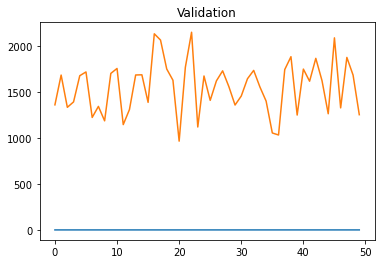

3/3 [==============================] - 0s 15ms/step


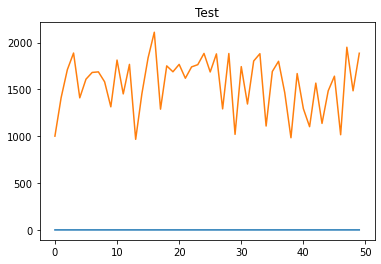

3/3 [==============================] - 0s 6ms/step


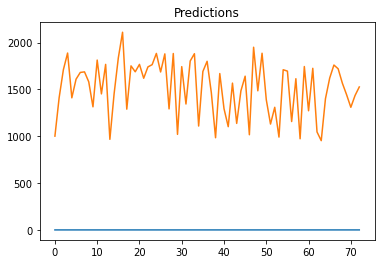

In [6]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/50
1/8 [==>...........................] - ETA: 21s - loss: 2305117.7500 - root_mean_squared_error: 1518.2615INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 675ms/step - loss: 2533654.2500 - root_mean_squared_error: 1591.7456 - val_loss: 2507398.0000 - val_root_mean_squared_error: 1583.4766
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 2611527.0000 - root_mean_squared_error: 1616.0220INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 874ms/step - loss: 2533491.7500 - root_mean_squared_error: 1591.6946 - val_loss: 2507236.2500 - val_root_mean_squared_error: 1583.4255
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2533329.5000 - root_mean_squared_error: 1591.6437INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 704ms/step - loss: 2533329.5000 - root_mean_squared_error: 1591.6437 - val_loss: 2507074.0000 - val_root_mean_squared_error: 1583.3743
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2533168.0000 - root_mean_squared_error: 1591.5929INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 565ms/step - loss: 2533168.0000 - root_mean_squared_error: 1591.5929 - val_loss: 2506912.2500 - val_root_mean_squared_error: 1583.3231
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 2460131.7500 - root_mean_squared_error: 1568.4807INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 657ms/step - loss: 2533006.5000 - root_mean_squared_error: 1591.5422 - val_loss: 2506751.2500 - val_root_mean_squared_error: 1583.2723
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2526416.0000 - root_mean_squared_error: 1589.4703INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 807ms/step - loss: 2532845.7500 - root_mean_squared_error: 1591.4917 - val_loss: 2506590.0000 - val_root_mean_squared_error: 1583.2214
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2511711.2500 - root_mean_squared_error: 1584.8379INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 525ms/step - loss: 2532683.0000 - root_mean_squared_error: 1591.4406 - val_loss: 2506428.5000 - val_root_mean_squared_error: 1583.1704
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 2699136.2500 - root_mean_squared_error: 1642.9048INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 543ms/step - loss: 2532521.5000 - root_mean_squared_error: 1591.3898 - val_loss: 2506265.5000 - val_root_mean_squared_error: 1583.1189
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 2695742.7500 - root_mean_squared_error: 1641.8717INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 692ms/step - loss: 2532358.2500 - root_mean_squared_error: 1591.3385 - val_loss: 2506102.5000 - val_root_mean_squared_error: 1583.0674
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2532195.7500 - root_mean_squared_error: 1591.2875INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 852ms/step - loss: 2532195.7500 - root_mean_squared_error: 1591.2875 - val_loss: 2505939.7500 - val_root_mean_squared_error: 1583.0160
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 2517279.0000 - root_mean_squared_error: 1586.5935INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 628ms/step - loss: 2532033.0000 - root_mean_squared_error: 1591.2363 - val_loss: 2505778.0000 - val_root_mean_squared_error: 1582.9650
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2531871.0000 - root_mean_squared_error: 1591.1854INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 612ms/step - loss: 2531871.0000 - root_mean_squared_error: 1591.1854 - val_loss: 2505616.0000 - val_root_mean_squared_error: 1582.9138
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 2489982.0000 - root_mean_squared_error: 1577.9677INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 668ms/step - loss: 2531709.7500 - root_mean_squared_error: 1591.1348 - val_loss: 2505453.0000 - val_root_mean_squared_error: 1582.8623
Epoch 14/50
4/8 [==============>...............] - ETA: 0s - loss: 2524454.0000 - root_mean_squared_error: 1588.8530INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 688ms/step - loss: 2531546.7500 - root_mean_squared_error: 1591.0835 - val_loss: 2505291.5000 - val_root_mean_squared_error: 1582.8113
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2531384.5000 - root_mean_squared_error: 1591.0325INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 644ms/step - loss: 2531384.5000 - root_mean_squared_error: 1591.0325 - val_loss: 2505130.5000 - val_root_mean_squared_error: 1582.7604
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2532654.0000 - root_mean_squared_error: 1591.4314INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 662ms/step - loss: 2531224.0000 - root_mean_squared_error: 1590.9821 - val_loss: 2504969.5000 - val_root_mean_squared_error: 1582.7096
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 2455732.5000 - root_mean_squared_error: 1567.0776INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 658ms/step - loss: 2531062.0000 - root_mean_squared_error: 1590.9312 - val_loss: 2504808.0000 - val_root_mean_squared_error: 1582.6586
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 2521688.5000 - root_mean_squared_error: 1587.9825INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 864ms/step - loss: 2530901.0000 - root_mean_squared_error: 1590.8806 - val_loss: 2504646.0000 - val_root_mean_squared_error: 1582.6073
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 2807273.2500 - root_mean_squared_error: 1675.4919INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 729ms/step - loss: 2530739.5000 - root_mean_squared_error: 1590.8298 - val_loss: 2504483.0000 - val_root_mean_squared_error: 1582.5558
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 2546378.0000 - root_mean_squared_error: 1595.7374INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 722ms/step - loss: 2530576.2500 - root_mean_squared_error: 1590.7786 - val_loss: 2504321.0000 - val_root_mean_squared_error: 1582.5048
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2530414.2500 - root_mean_squared_error: 1590.7275INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 747ms/step - loss: 2530414.2500 - root_mean_squared_error: 1590.7275 - val_loss: 2504160.0000 - val_root_mean_squared_error: 1582.4537
Epoch 22/50
4/8 [==============>...............] - ETA: 0s - loss: 2513031.5000 - root_mean_squared_error: 1585.2544INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 676ms/step - loss: 2530252.7500 - root_mean_squared_error: 1590.6769 - val_loss: 2503997.5000 - val_root_mean_squared_error: 1582.4025
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2541416.0000 - root_mean_squared_error: 1594.1819INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 882ms/step - loss: 2530091.5000 - root_mean_squared_error: 1590.6261 - val_loss: 2503835.0000 - val_root_mean_squared_error: 1582.3511
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 2380727.0000 - root_mean_squared_error: 1542.9604INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 685ms/step - loss: 2529927.5000 - root_mean_squared_error: 1590.5746 - val_loss: 2503674.5000 - val_root_mean_squared_error: 1582.3003
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2529766.5000 - root_mean_squared_error: 1590.5239INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 630ms/step - loss: 2529766.5000 - root_mean_squared_error: 1590.5239 - val_loss: 2503512.5000 - val_root_mean_squared_error: 1582.2491
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2525719.5000 - root_mean_squared_error: 1589.2512INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 680ms/step - loss: 2529604.5000 - root_mean_squared_error: 1590.4730 - val_loss: 2503349.5000 - val_root_mean_squared_error: 1582.1976
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2358633.7500 - root_mean_squared_error: 1535.7844INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 897ms/step - loss: 2529442.2500 - root_mean_squared_error: 1590.4220 - val_loss: 2503187.2500 - val_root_mean_squared_error: 1582.1464
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2510059.7500 - root_mean_squared_error: 1584.3168INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 523ms/step - loss: 2529280.5000 - root_mean_squared_error: 1590.3712 - val_loss: 2503025.0000 - val_root_mean_squared_error: 1582.0951
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 2640451.5000 - root_mean_squared_error: 1624.9467INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 635ms/step - loss: 2529118.5000 - root_mean_squared_error: 1590.3202 - val_loss: 2502862.2500 - val_root_mean_squared_error: 1582.0436
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 2337908.7500 - root_mean_squared_error: 1529.0221INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 700ms/step - loss: 2528954.2500 - root_mean_squared_error: 1590.2686 - val_loss: 2502700.2500 - val_root_mean_squared_error: 1581.9926
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2538347.2500 - root_mean_squared_error: 1593.2191INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 743ms/step - loss: 2528792.7500 - root_mean_squared_error: 1590.2178 - val_loss: 2502538.0000 - val_root_mean_squared_error: 1581.9412
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 2571481.0000 - root_mean_squared_error: 1603.5837INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 605ms/step - loss: 2528630.5000 - root_mean_squared_error: 1590.1669 - val_loss: 2502375.7500 - val_root_mean_squared_error: 1581.8899
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 2225616.5000 - root_mean_squared_error: 1491.8500INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 702ms/step - loss: 2528468.0000 - root_mean_squared_error: 1590.1157 - val_loss: 2502213.2500 - val_root_mean_squared_error: 1581.8386
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 2516794.7500 - root_mean_squared_error: 1586.4409INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 712ms/step - loss: 2528306.2500 - root_mean_squared_error: 1590.0648 - val_loss: 2502051.2500 - val_root_mean_squared_error: 1581.7874
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 2543043.7500 - root_mean_squared_error: 1594.6924INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 606ms/step - loss: 2528143.2500 - root_mean_squared_error: 1590.0135 - val_loss: 2501888.7500 - val_root_mean_squared_error: 1581.7360
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 2419465.7500 - root_mean_squared_error: 1555.4631INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 832ms/step - loss: 2527981.7500 - root_mean_squared_error: 1589.9628 - val_loss: 2501727.0000 - val_root_mean_squared_error: 1581.6848
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2631283.5000 - root_mean_squared_error: 1622.1232INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 671ms/step - loss: 2527820.5000 - root_mean_squared_error: 1589.9121 - val_loss: 2501565.5000 - val_root_mean_squared_error: 1581.6338
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 2519318.5000 - root_mean_squared_error: 1587.2361INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 661ms/step - loss: 2527659.0000 - root_mean_squared_error: 1589.8613 - val_loss: 2501404.7500 - val_root_mean_squared_error: 1581.5830
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2527496.7500 - root_mean_squared_error: 1589.8103INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 766ms/step - loss: 2527496.7500 - root_mean_squared_error: 1589.8103 - val_loss: 2501243.5000 - val_root_mean_squared_error: 1581.5320
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 2392233.5000 - root_mean_squared_error: 1546.6847INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 759ms/step - loss: 2527336.2500 - root_mean_squared_error: 1589.7598 - val_loss: 2501081.7500 - val_root_mean_squared_error: 1581.4808
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 2578269.0000 - root_mean_squared_error: 1605.6989INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 631ms/step - loss: 2527173.7500 - root_mean_squared_error: 1589.7087 - val_loss: 2500919.7500 - val_root_mean_squared_error: 1581.4297
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 2595309.2500 - root_mean_squared_error: 1610.9963INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 668ms/step - loss: 2527012.5000 - root_mean_squared_error: 1589.6580 - val_loss: 2500758.0000 - val_root_mean_squared_error: 1581.3785
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 2576815.7500 - root_mean_squared_error: 1605.2463INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 646ms/step - loss: 2526851.2500 - root_mean_squared_error: 1589.6073 - val_loss: 2500595.2500 - val_root_mean_squared_error: 1581.3270
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 2626591.5000 - root_mean_squared_error: 1620.6763INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 688ms/step - loss: 2526688.2500 - root_mean_squared_error: 1589.5560 - val_loss: 2500434.0000 - val_root_mean_squared_error: 1581.2761
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 2535948.0000 - root_mean_squared_error: 1592.4661INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 546ms/step - loss: 2526527.7500 - root_mean_squared_error: 1589.5055 - val_loss: 2500272.5000 - val_root_mean_squared_error: 1581.2250
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2526365.7500 - root_mean_squared_error: 1589.4546INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 504ms/step - loss: 2526365.7500 - root_mean_squared_error: 1589.4546 - val_loss: 2500112.5000 - val_root_mean_squared_error: 1581.1744
Epoch 47/50
2/8 [======>.......................] - ETA: 0s - loss: 2640261.7500 - root_mean_squared_error: 1624.8882INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 608ms/step - loss: 2526205.0000 - root_mean_squared_error: 1589.4039 - val_loss: 2499951.2500 - val_root_mean_squared_error: 1581.1234
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 2625087.5000 - root_mean_squared_error: 1620.2122INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 616ms/step - loss: 2526043.2500 - root_mean_squared_error: 1589.3531 - val_loss: 2499789.2500 - val_root_mean_squared_error: 1581.0721
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2267623.7500 - root_mean_squared_error: 1505.8632INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 626ms/step - loss: 2525880.5000 - root_mean_squared_error: 1589.3019 - val_loss: 2499626.0000 - val_root_mean_squared_error: 1581.0205
Epoch 50/50
5/8 [=================>............] - ETA: 0s - loss: 2536108.2500 - root_mean_squared_error: 1592.5164INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 3ms/step


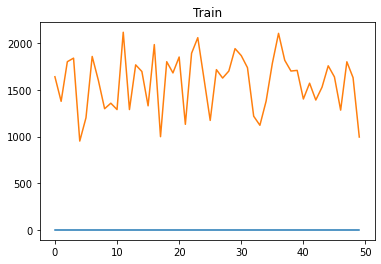

2/2 [==============================] - 0s 7ms/step


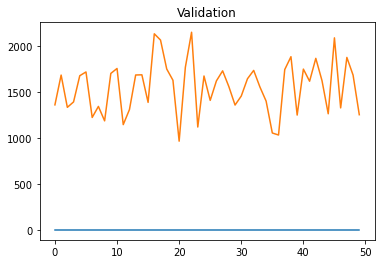

3/3 [==============================] - 0s 4ms/step


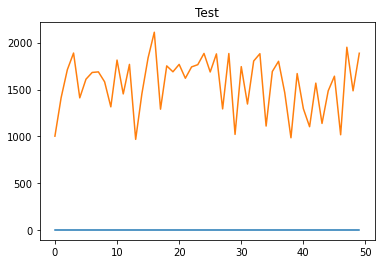

3/3 [==============================] - 0s 4ms/step


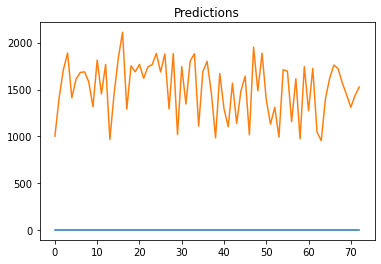

In [7]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [8]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2575838.7500 - root_mean_squared_error: 1604.9420

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 618ms/step - loss: 2575838.7500 - root_mean_squared_error: 1604.9420 - val_loss: 2443100.5000 - val_root_mean_squared_error: 1563.0421
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 2448600.2500 - root_mean_squared_error: 1564.8004

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 401ms/step - loss: 2407461.0000 - root_mean_squared_error: 1551.5995 - val_loss: 2273807.2500 - val_root_mean_squared_error: 1507.9149
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2242908.0000 - root_mean_squared_error: 1497.6342

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 405ms/step - loss: 2242908.0000 - root_mean_squared_error: 1497.6342 - val_loss: 2112473.0000 - val_root_mean_squared_error: 1453.4349
Epoch 4/50
5/8 [=================>............] - ETA: 0s - loss: 2027227.2500 - root_mean_squared_error: 1423.8073

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 367ms/step - loss: 2086930.0000 - root_mean_squared_error: 1444.6211 - val_loss: 1959972.3750 - val_root_mean_squared_error: 1399.9901
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 1968599.6250 - root_mean_squared_error: 1403.0680

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 344ms/step - loss: 1940363.7500 - root_mean_squared_error: 1392.9694 - val_loss: 1814954.5000 - val_root_mean_squared_error: 1347.2025
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 1788278.2500 - root_mean_squared_error: 1337.2653

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 357ms/step - loss: 1800824.6250 - root_mean_squared_error: 1341.9481 - val_loss: 1677052.3750 - val_root_mean_squared_error: 1295.0106
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 1580018.7500 - root_mean_squared_error: 1256.9879

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 282ms/step - loss: 1667080.5000 - root_mean_squared_error: 1291.1547 - val_loss: 1546644.2500 - val_root_mean_squared_error: 1243.6415
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 1541377.1250 - root_mean_squared_error: 1241.5221

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 312ms/step - loss: 1541377.1250 - root_mean_squared_error: 1241.5221 - val_loss: 1423227.6250 - val_root_mean_squared_error: 1192.9911
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 1404035.8750 - root_mean_squared_error: 1184.9202

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 387ms/step - loss: 1422230.0000 - root_mean_squared_error: 1192.5729 - val_loss: 1308288.0000 - val_root_mean_squared_error: 1143.8042
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 1311911.6250 - root_mean_squared_error: 1145.3871

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 451ms/step - loss: 1311911.6250 - root_mean_squared_error: 1145.3871 - val_loss: 1199327.7500 - val_root_mean_squared_error: 1095.1382
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 1209026.3750 - root_mean_squared_error: 1099.5574

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 331ms/step - loss: 1206816.8750 - root_mean_squared_error: 1098.5521 - val_loss: 1096745.2500 - val_root_mean_squared_error: 1047.2561
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 1109266.7500 - root_mean_squared_error: 1053.2173

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 347ms/step - loss: 1109005.0000 - root_mean_squared_error: 1053.0930 - val_loss: 1000139.0625 - val_root_mean_squared_error: 1000.0695
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 1015753.5000 - root_mean_squared_error: 1007.8459

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 325ms/step - loss: 1015753.5000 - root_mean_squared_error: 1007.8459 - val_loss: 909783.7500 - val_root_mean_squared_error: 953.8259
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 1101071.0000 - root_mean_squared_error: 1049.3193

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 347ms/step - loss: 929230.6250 - root_mean_squared_error: 963.9661 - val_loss: 825627.8750 - val_root_mean_squared_error: 908.6407
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 880965.3750 - root_mean_squared_error: 938.5975

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 347ms/step - loss: 848712.1250 - root_mean_squared_error: 921.2557 - val_loss: 746938.6250 - val_root_mean_squared_error: 864.2561
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 771413.0000 - root_mean_squared_error: 878.3012

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 356ms/step - loss: 772965.6875 - root_mean_squared_error: 879.1847 - val_loss: 674316.4375 - val_root_mean_squared_error: 821.1677
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 791490.6875 - root_mean_squared_error: 889.6577

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 343ms/step - loss: 703215.3125 - root_mean_squared_error: 838.5793 - val_loss: 605756.0000 - val_root_mean_squared_error: 778.3033
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 701729.1875 - root_mean_squared_error: 837.6927

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 410ms/step - loss: 637338.7500 - root_mean_squared_error: 798.3350 - val_loss: 542008.2500 - val_root_mean_squared_error: 736.2121
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 576994.6875 - root_mean_squared_error: 759.6017

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 321ms/step - loss: 576994.6875 - root_mean_squared_error: 759.6017 - val_loss: 484213.2500 - val_root_mean_squared_error: 695.8543
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 430550.2500 - root_mean_squared_error: 656.1633

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 296ms/step - loss: 521845.3438 - root_mean_squared_error: 722.3886 - val_loss: 430663.6250 - val_root_mean_squared_error: 656.2497
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 438436.3125 - root_mean_squared_error: 662.1453

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 318ms/step - loss: 470826.6875 - root_mean_squared_error: 686.1681 - val_loss: 382813.5312 - val_root_mean_squared_error: 618.7192
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 425833.8750 - root_mean_squared_error: 652.5595

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 344ms/step - loss: 425833.8750 - root_mean_squared_error: 652.5595 - val_loss: 338102.0938 - val_root_mean_squared_error: 581.4655
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 396442.0312 - root_mean_squared_error: 629.6364

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 360ms/step - loss: 382596.3438 - root_mean_squared_error: 618.5437 - val_loss: 297488.4688 - val_root_mean_squared_error: 545.4250
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 253786.1875 - root_mean_squared_error: 503.7720

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 388ms/step - loss: 343385.0625 - root_mean_squared_error: 585.9907 - val_loss: 260801.5625 - val_root_mean_squared_error: 510.6873
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 306398.4062 - root_mean_squared_error: 553.5327

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 319ms/step - loss: 309352.5312 - root_mean_squared_error: 556.1947 - val_loss: 227614.0000 - val_root_mean_squared_error: 477.0891
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 241405.9844 - root_mean_squared_error: 491.3308

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 307ms/step - loss: 278033.0625 - root_mean_squared_error: 527.2884 - val_loss: 198375.4531 - val_root_mean_squared_error: 445.3936
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 271868.0625 - root_mean_squared_error: 521.4097

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 422ms/step - loss: 250339.5000 - root_mean_squared_error: 500.3394 - val_loss: 171823.3750 - val_root_mean_squared_error: 414.5158
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 283936.8750 - root_mean_squared_error: 532.8573

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 348ms/step - loss: 225795.8125 - root_mean_squared_error: 475.1798 - val_loss: 148506.1562 - val_root_mean_squared_error: 385.3650
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 191458.2031 - root_mean_squared_error: 437.5594

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 327ms/step - loss: 203423.0938 - root_mean_squared_error: 451.0245 - val_loss: 128128.1875 - val_root_mean_squared_error: 357.9500
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 173637.7812 - root_mean_squared_error: 416.6987

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 335ms/step - loss: 184095.5781 - root_mean_squared_error: 429.0636 - val_loss: 109975.6406 - val_root_mean_squared_error: 331.6258
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 167211.0781 - root_mean_squared_error: 408.9145

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 332ms/step - loss: 167211.0781 - root_mean_squared_error: 408.9145 - val_loss: 94392.3359 - val_root_mean_squared_error: 307.2334
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 156292.5156 - root_mean_squared_error: 395.3385

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 352ms/step - loss: 152584.2656 - root_mean_squared_error: 390.6204 - val_loss: 79990.7734 - val_root_mean_squared_error: 282.8264
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 138980.7031 - root_mean_squared_error: 372.8011

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 250ms/step - loss: 138980.7031 - root_mean_squared_error: 372.8011 - val_loss: 67571.5703 - val_root_mean_squared_error: 259.9453
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 127553.7500 - root_mean_squared_error: 357.1467

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 354ms/step - loss: 127553.7500 - root_mean_squared_error: 357.1467 - val_loss: 56881.9727 - val_root_mean_squared_error: 238.4994
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 105628.0000 - root_mean_squared_error: 325.0046

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 314ms/step - loss: 117273.2500 - root_mean_squared_error: 342.4518 - val_loss: 47548.9414 - val_root_mean_squared_error: 218.0572
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 127998.2344 - root_mean_squared_error: 357.7684

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 282ms/step - loss: 108619.7578 - root_mean_squared_error: 329.5751 - val_loss: 39542.9336 - val_root_mean_squared_error: 198.8540
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 102667.3750 - root_mean_squared_error: 320.4175

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 411ms/step - loss: 101400.8125 - root_mean_squared_error: 318.4349 - val_loss: 32628.3105 - val_root_mean_squared_error: 180.6331
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 95885.6797 - root_mean_squared_error: 309.6541

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 304ms/step - loss: 95014.2812 - root_mean_squared_error: 308.2439 - val_loss: 27097.3926 - val_root_mean_squared_error: 164.6129
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 107186.9375 - root_mean_squared_error: 327.3942

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 263ms/step - loss: 90072.8672 - root_mean_squared_error: 300.1214 - val_loss: 22882.4707 - val_root_mean_squared_error: 151.2695
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 86280.8438 - root_mean_squared_error: 293.7360

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 363ms/step - loss: 86280.8438 - root_mean_squared_error: 293.7360 - val_loss: 19398.4531 - val_root_mean_squared_error: 139.2783
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 74414.1562 - root_mean_squared_error: 272.7896

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 359ms/step - loss: 82966.3906 - root_mean_squared_error: 288.0389 - val_loss: 16659.4590 - val_root_mean_squared_error: 129.0715
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 110646.3438 - root_mean_squared_error: 332.6354

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 335ms/step - loss: 80397.8828 - root_mean_squared_error: 283.5452 - val_loss: 14034.1592 - val_root_mean_squared_error: 118.4659
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 77921.4531 - root_mean_squared_error: 279.1441 

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 312ms/step - loss: 77921.4531 - root_mean_squared_error: 279.1441 - val_loss: 11888.6943 - val_root_mean_squared_error: 109.0353
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 75869.5703 - root_mean_squared_error: 275.4443

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 243ms/step - loss: 75869.5703 - root_mean_squared_error: 275.4443 - val_loss: 10201.6182 - val_root_mean_squared_error: 101.0031
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 63439.9531 - root_mean_squared_error: 251.8729

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 388ms/step - loss: 74265.0859 - root_mean_squared_error: 272.5162 - val_loss: 8826.2998 - val_root_mean_squared_error: 93.9484
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 69817.0547 - root_mean_squared_error: 264.2292

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 283ms/step - loss: 73069.7578 - root_mean_squared_error: 270.3142 - val_loss: 7767.7490 - val_root_mean_squared_error: 88.1348
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 71575.6406 - root_mean_squared_error: 267.5363

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 264ms/step - loss: 71950.7344 - root_mean_squared_error: 268.2363 - val_loss: 6797.7393 - val_root_mean_squared_error: 82.4484
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 67781.2500 - root_mean_squared_error: 260.3483

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 280ms/step - loss: 71167.9375 - root_mean_squared_error: 266.7732 - val_loss: 6019.4126 - val_root_mean_squared_error: 77.5849
Epoch 49/50
4/8 [==============>...............] - ETA: 0s - loss: 67539.3984 - root_mean_squared_error: 259.8834

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 248ms/step - loss: 70518.8594 - root_mean_squared_error: 265.5539 - val_loss: 5467.5767 - val_root_mean_squared_error: 73.9431
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 70473.0938 - root_mean_squared_error: 265.4677

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 0s 7ms/step


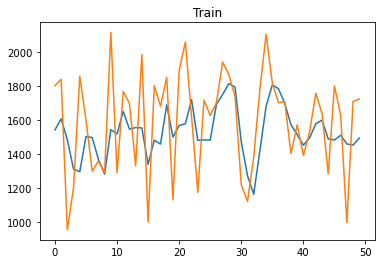

2/2 [==============================] - 0s 5ms/step


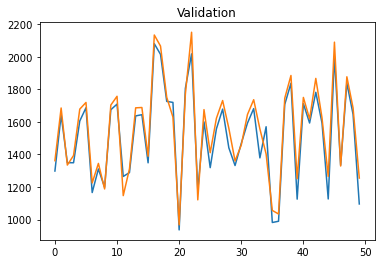

3/3 [==============================] - 0s 3ms/step


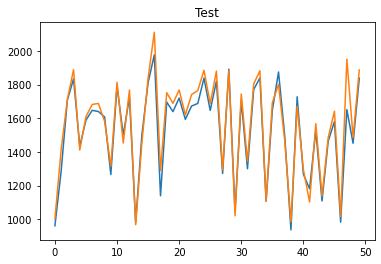

3/3 [==============================] - 0s 7ms/step


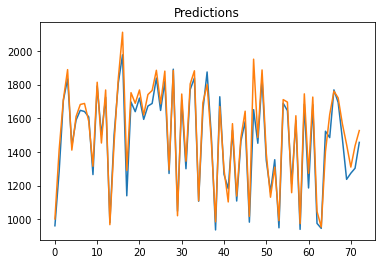

In [9]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2534230.7500 - root_mean_squared_error: 1591.9268

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 2s/step - loss: 2534230.7500 - root_mean_squared_error: 1591.9268 - val_loss: 2505862.0000 - val_root_mean_squared_error: 1582.9915
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2533875.7500 - root_mean_squared_error: 1591.8152

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2533875.7500 - root_mean_squared_error: 1591.8152 - val_loss: 2505076.5000 - val_root_mean_squared_error: 1582.7433
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 2574825.7500 - root_mean_squared_error: 1604.6263

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2532914.5000 - root_mean_squared_error: 1591.5133 - val_loss: 2504265.7500 - val_root_mean_squared_error: 1582.4872
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2541865.2500 - root_mean_squared_error: 1594.3229

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2532407.5000 - root_mean_squared_error: 1591.3540 - val_loss: 2504081.0000 - val_root_mean_squared_error: 1582.4288
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 2516137.7500 - root_mean_squared_error: 1586.2339

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2532274.2500 - root_mean_squared_error: 1591.3121 - val_loss: 2503979.7500 - val_root_mean_squared_error: 1582.3969
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2519961.7500 - root_mean_squared_error: 1587.4387

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2532178.2500 - root_mean_squared_error: 1591.2820 - val_loss: 2503895.7500 - val_root_mean_squared_error: 1582.3702
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2530260.0000 - root_mean_squared_error: 1590.6791

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2532101.2500 - root_mean_squared_error: 1591.2578 - val_loss: 2503824.5000 - val_root_mean_squared_error: 1582.3478
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2530182.7500 - root_mean_squared_error: 1590.6548

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2532031.2500 - root_mean_squared_error: 1591.2357 - val_loss: 2503754.7500 - val_root_mean_squared_error: 1582.3257
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2519700.0000 - root_mean_squared_error: 1587.3563

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2531961.2500 - root_mean_squared_error: 1591.2137 - val_loss: 2503685.5000 - val_root_mean_squared_error: 1582.3038
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2533254.7500 - root_mean_squared_error: 1591.6201

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2531892.2500 - root_mean_squared_error: 1591.1921 - val_loss: 2503616.0000 - val_root_mean_squared_error: 1582.2819
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2531823.0000 - root_mean_squared_error: 1591.1703

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2531823.0000 - root_mean_squared_error: 1591.1703 - val_loss: 2503547.0000 - val_root_mean_squared_error: 1582.2601
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2531754.5000 - root_mean_squared_error: 1591.1488

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2531754.5000 - root_mean_squared_error: 1591.1488 - val_loss: 2503478.5000 - val_root_mean_squared_error: 1582.2384
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2524314.7500 - root_mean_squared_error: 1588.8092

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2531685.5000 - root_mean_squared_error: 1591.1271 - val_loss: 2503410.0000 - val_root_mean_squared_error: 1582.2169
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 2622524.0000 - root_mean_squared_error: 1619.4209

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2531616.7500 - root_mean_squared_error: 1591.1055 - val_loss: 2503341.2500 - val_root_mean_squared_error: 1582.1951
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2531548.5000 - root_mean_squared_error: 1591.0841

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2531548.5000 - root_mean_squared_error: 1591.0841 - val_loss: 2503272.7500 - val_root_mean_squared_error: 1582.1735
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 2560512.2500 - root_mean_squared_error: 1600.1600

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2531480.2500 - root_mean_squared_error: 1591.0626 - val_loss: 2503205.0000 - val_root_mean_squared_error: 1582.1520
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 2593781.5000 - root_mean_squared_error: 1610.5221

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2531412.5000 - root_mean_squared_error: 1591.0414 - val_loss: 2503136.7500 - val_root_mean_squared_error: 1582.1304
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2524012.5000 - root_mean_squared_error: 1588.7141

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2531343.2500 - root_mean_squared_error: 1591.0195 - val_loss: 2503069.2500 - val_root_mean_squared_error: 1582.1091
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2531276.0000 - root_mean_squared_error: 1590.9985

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2531276.0000 - root_mean_squared_error: 1590.9985 - val_loss: 2503000.7500 - val_root_mean_squared_error: 1582.0875
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 2542189.5000 - root_mean_squared_error: 1594.4246

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2531208.0000 - root_mean_squared_error: 1590.9771 - val_loss: 2502933.0000 - val_root_mean_squared_error: 1582.0662
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2531859.2500 - root_mean_squared_error: 1591.1818

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2531140.5000 - root_mean_squared_error: 1590.9558 - val_loss: 2502865.5000 - val_root_mean_squared_error: 1582.0447
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2543434.7500 - root_mean_squared_error: 1594.8149

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2531072.7500 - root_mean_squared_error: 1590.9346 - val_loss: 2502797.7500 - val_root_mean_squared_error: 1582.0233
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2539701.5000 - root_mean_squared_error: 1593.6440

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2531005.2500 - root_mean_squared_error: 1590.9133 - val_loss: 2502730.2500 - val_root_mean_squared_error: 1582.0020
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 2781539.0000 - root_mean_squared_error: 1667.7947

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2530937.5000 - root_mean_squared_error: 1590.8921 - val_loss: 2502662.2500 - val_root_mean_squared_error: 1581.9805
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2531085.7500 - root_mean_squared_error: 1590.9386

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2530870.0000 - root_mean_squared_error: 1590.8708 - val_loss: 2502594.5000 - val_root_mean_squared_error: 1581.9591
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2536419.5000 - root_mean_squared_error: 1592.6140

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2530802.0000 - root_mean_squared_error: 1590.8495 - val_loss: 2502527.0000 - val_root_mean_squared_error: 1581.9377
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2516897.0000 - root_mean_squared_error: 1586.4731

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2530734.0000 - root_mean_squared_error: 1590.8281 - val_loss: 2502459.2500 - val_root_mean_squared_error: 1581.9164
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 2559431.5000 - root_mean_squared_error: 1599.8224

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2530666.7500 - root_mean_squared_error: 1590.8070 - val_loss: 2502391.5000 - val_root_mean_squared_error: 1581.8949
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2530598.7500 - root_mean_squared_error: 1590.7855

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2530598.7500 - root_mean_squared_error: 1590.7855 - val_loss: 2502324.2500 - val_root_mean_squared_error: 1581.8737
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 2628258.5000 - root_mean_squared_error: 1621.1904

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2530532.0000 - root_mean_squared_error: 1590.7646 - val_loss: 2502256.5000 - val_root_mean_squared_error: 1581.8523
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2731791.0000 - root_mean_squared_error: 1652.8131

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2530464.2500 - root_mean_squared_error: 1590.7433 - val_loss: 2502188.7500 - val_root_mean_squared_error: 1581.8308
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2521504.0000 - root_mean_squared_error: 1587.9244

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2530396.0000 - root_mean_squared_error: 1590.7218 - val_loss: 2502120.7500 - val_root_mean_squared_error: 1581.8093
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 2688777.2500 - root_mean_squared_error: 1639.7491

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2530327.5000 - root_mean_squared_error: 1590.7003 - val_loss: 2502053.2500 - val_root_mean_squared_error: 1581.7880
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2530260.7500 - root_mean_squared_error: 1590.6793

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2530260.7500 - root_mean_squared_error: 1590.6793 - val_loss: 2501985.5000 - val_root_mean_squared_error: 1581.7666
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2530193.2500 - root_mean_squared_error: 1590.6581

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2530193.2500 - root_mean_squared_error: 1590.6581 - val_loss: 2501918.0000 - val_root_mean_squared_error: 1581.7452
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2530125.7500 - root_mean_squared_error: 1590.6368

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2530125.7500 - root_mean_squared_error: 1590.6368 - val_loss: 2501850.5000 - val_root_mean_squared_error: 1581.7239
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2525221.5000 - root_mean_squared_error: 1589.0946

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2530057.5000 - root_mean_squared_error: 1590.6155 - val_loss: 2501782.5000 - val_root_mean_squared_error: 1581.7024
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2540878.5000 - root_mean_squared_error: 1594.0133

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2529990.2500 - root_mean_squared_error: 1590.5944 - val_loss: 2501714.7500 - val_root_mean_squared_error: 1581.6810
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2529922.0000 - root_mean_squared_error: 1590.5729

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2529922.0000 - root_mean_squared_error: 1590.5729 - val_loss: 2501647.7500 - val_root_mean_squared_error: 1581.6598
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2540041.5000 - root_mean_squared_error: 1593.7507

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2529854.5000 - root_mean_squared_error: 1590.5516 - val_loss: 2501580.2500 - val_root_mean_squared_error: 1581.6383
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2533030.2500 - root_mean_squared_error: 1591.5497

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2529787.5000 - root_mean_squared_error: 1590.5305 - val_loss: 2501512.7500 - val_root_mean_squared_error: 1581.6172
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 2481820.5000 - root_mean_squared_error: 1575.3795

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2529720.2500 - root_mean_squared_error: 1590.5094 - val_loss: 2501445.5000 - val_root_mean_squared_error: 1581.5958
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2529653.0000 - root_mean_squared_error: 1590.4883

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2529653.0000 - root_mean_squared_error: 1590.4883 - val_loss: 2501378.5000 - val_root_mean_squared_error: 1581.5747
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 2443466.5000 - root_mean_squared_error: 1563.1592

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2529585.5000 - root_mean_squared_error: 1590.4670 - val_loss: 2501311.5000 - val_root_mean_squared_error: 1581.5535
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 2564883.0000 - root_mean_squared_error: 1601.5253

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2529518.7500 - root_mean_squared_error: 1590.4460 - val_loss: 2501243.7500 - val_root_mean_squared_error: 1581.5321
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2529451.0000 - root_mean_squared_error: 1590.4248

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2529451.0000 - root_mean_squared_error: 1590.4248 - val_loss: 2501176.2500 - val_root_mean_squared_error: 1581.5107
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2529383.5000 - root_mean_squared_error: 1590.4036

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2529383.5000 - root_mean_squared_error: 1590.4036 - val_loss: 2501109.2500 - val_root_mean_squared_error: 1581.4896
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 2610009.0000 - root_mean_squared_error: 1615.5522

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2529315.7500 - root_mean_squared_error: 1590.3823 - val_loss: 2501041.5000 - val_root_mean_squared_error: 1581.4683
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2667000.0000 - root_mean_squared_error: 1633.0952

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2529248.7500 - root_mean_squared_error: 1590.3612 - val_loss: 2500973.2500 - val_root_mean_squared_error: 1581.4465
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2529180.5000 - root_mean_squared_error: 1590.3397

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 2s 6ms/step


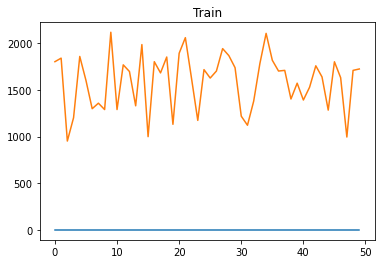

2/2 [==============================] - 2s 7ms/step


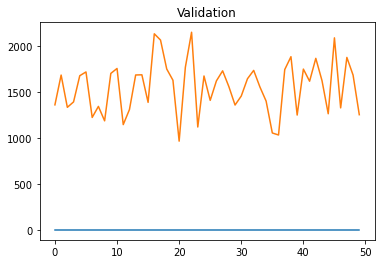

3/3 [==============================] - 0s 16ms/step


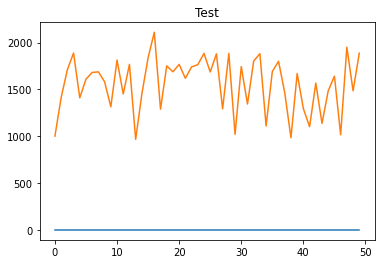

3/3 [==============================] - 0s 7ms/step


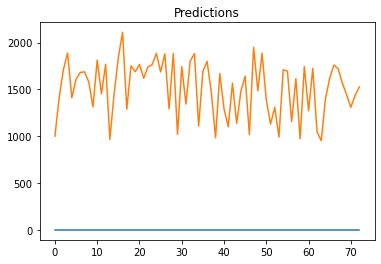

In [10]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 2525179.0000 - root_mean_squared_error: 1589.0812 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 2s/step - loss: 2531120.0000 - root_mean_squared_error: 1590.9495 - val_loss: 2502857.0000 - val_root_mean_squared_error: 1582.0420
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 2507219.5000 - root_mean_squared_error: 1583.4202

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2531073.0000 - root_mean_squared_error: 1590.9346 - val_loss: 2502809.5000 - val_root_mean_squared_error: 1582.0270
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 2520729.0000 - root_mean_squared_error: 1587.6804

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2531024.7500 - root_mean_squared_error: 1590.9194 - val_loss: 2502756.7500 - val_root_mean_squared_error: 1582.0104
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 2748345.5000 - root_mean_squared_error: 1657.8135

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2530959.0000 - root_mean_squared_error: 1590.8988 - val_loss: 2502582.5000 - val_root_mean_squared_error: 1581.9553
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 2530237.7500 - root_mean_squared_error: 1590.6721

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2530390.7500 - root_mean_squared_error: 1590.7202 - val_loss: 2501791.0000 - val_root_mean_squared_error: 1581.7051
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2531919.5000 - root_mean_squared_error: 1591.2007

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2529987.7500 - root_mean_squared_error: 1590.5935 - val_loss: 2501703.2500 - val_root_mean_squared_error: 1581.6774
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2529906.7500 - root_mean_squared_error: 1590.5681

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2529906.7500 - root_mean_squared_error: 1590.5681 - val_loss: 2501626.0000 - val_root_mean_squared_error: 1581.6530
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2522679.5000 - root_mean_squared_error: 1588.2946

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2529830.2500 - root_mean_squared_error: 1590.5441 - val_loss: 2501551.0000 - val_root_mean_squared_error: 1581.6293
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2525968.7500 - root_mean_squared_error: 1589.3297

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2529754.7500 - root_mean_squared_error: 1590.5203 - val_loss: 2501473.0000 - val_root_mean_squared_error: 1581.6045
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2529673.0000 - root_mean_squared_error: 1590.4946

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2529673.0000 - root_mean_squared_error: 1590.4946 - val_loss: 2501373.0000 - val_root_mean_squared_error: 1581.5730
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2529532.2500 - root_mean_squared_error: 1590.4503

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2529532.2500 - root_mean_squared_error: 1590.4503 - val_loss: 2501096.5000 - val_root_mean_squared_error: 1581.4856
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2529115.5000 - root_mean_squared_error: 1590.3193

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2529115.5000 - root_mean_squared_error: 1590.3193 - val_loss: 2500636.7500 - val_root_mean_squared_error: 1581.3402
Epoch 13/50
5/8 [=================>............] - ETA: 0s - loss: 2501288.2500 - root_mean_squared_error: 1581.5461

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2528814.5000 - root_mean_squared_error: 1590.2246 - val_loss: 2500481.0000 - val_root_mean_squared_error: 1581.2909
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2523524.2500 - root_mean_squared_error: 1588.5604

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2528618.7500 - root_mean_squared_error: 1590.1631 - val_loss: 2500253.5000 - val_root_mean_squared_error: 1581.2190
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2528441.0000 - root_mean_squared_error: 1590.1072

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2528441.0000 - root_mean_squared_error: 1590.1072 - val_loss: 2500145.0000 - val_root_mean_squared_error: 1581.1847
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2528340.7500 - root_mean_squared_error: 1590.0757

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2528340.7500 - root_mean_squared_error: 1590.0757 - val_loss: 2500056.5000 - val_root_mean_squared_error: 1581.1567
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 2692839.0000 - root_mean_squared_error: 1640.9872

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2528260.0000 - root_mean_squared_error: 1590.0503 - val_loss: 2499981.2500 - val_root_mean_squared_error: 1581.1329
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 2544899.7500 - root_mean_squared_error: 1595.2742

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 2528184.5000 - root_mean_squared_error: 1590.0266 - val_loss: 2499907.0000 - val_root_mean_squared_error: 1581.1094
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2528110.7500 - root_mean_squared_error: 1590.0034

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2528110.7500 - root_mean_squared_error: 1590.0034 - val_loss: 2499833.5000 - val_root_mean_squared_error: 1581.0862
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 2478545.2500 - root_mean_squared_error: 1574.3396

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2528037.2500 - root_mean_squared_error: 1589.9802 - val_loss: 2499760.0000 - val_root_mean_squared_error: 1581.0630
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2527963.7500 - root_mean_squared_error: 1589.9572

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2527963.7500 - root_mean_squared_error: 1589.9572 - val_loss: 2499686.5000 - val_root_mean_squared_error: 1581.0397
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 2499472.0000 - root_mean_squared_error: 1580.9718

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2527890.5000 - root_mean_squared_error: 1589.9341 - val_loss: 2499612.7500 - val_root_mean_squared_error: 1581.0165
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2527816.7500 - root_mean_squared_error: 1589.9109

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2527816.7500 - root_mean_squared_error: 1589.9109 - val_loss: 2499538.7500 - val_root_mean_squared_error: 1580.9929
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2527742.2500 - root_mean_squared_error: 1589.8875

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2527742.2500 - root_mean_squared_error: 1589.8875 - val_loss: 2499466.2500 - val_root_mean_squared_error: 1580.9701
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 2514289.2500 - root_mean_squared_error: 1585.6510

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2527669.7500 - root_mean_squared_error: 1589.8647 - val_loss: 2499393.0000 - val_root_mean_squared_error: 1580.9469
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2527596.7500 - root_mean_squared_error: 1589.8418

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2527596.7500 - root_mean_squared_error: 1589.8418 - val_loss: 2499319.0000 - val_root_mean_squared_error: 1580.9235
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2530864.2500 - root_mean_squared_error: 1590.8690

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2527522.0000 - root_mean_squared_error: 1589.8182 - val_loss: 2499242.0000 - val_root_mean_squared_error: 1580.8992
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 2498455.5000 - root_mean_squared_error: 1580.6504

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2527434.0000 - root_mean_squared_error: 1589.7905 - val_loss: 2499105.5000 - val_root_mean_squared_error: 1580.8560
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 2421108.0000 - root_mean_squared_error: 1555.9910

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2527228.0000 - root_mean_squared_error: 1589.7257 - val_loss: 2498860.7500 - val_root_mean_squared_error: 1580.7786
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2524082.7500 - root_mean_squared_error: 1588.7362

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2527051.0000 - root_mean_squared_error: 1589.6700 - val_loss: 2498743.0000 - val_root_mean_squared_error: 1580.7413
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2655215.0000 - root_mean_squared_error: 1629.4830

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2526906.2500 - root_mean_squared_error: 1589.6245 - val_loss: 2498560.5000 - val_root_mean_squared_error: 1580.6836
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 2621829.5000 - root_mean_squared_error: 1619.2064

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2526719.0000 - root_mean_squared_error: 1589.5657 - val_loss: 2498370.7500 - val_root_mean_squared_error: 1580.6235
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 2561887.2500 - root_mean_squared_error: 1600.5896

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2526531.2500 - root_mean_squared_error: 1589.5066 - val_loss: 2498186.5000 - val_root_mean_squared_error: 1580.5653
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2526349.7500 - root_mean_squared_error: 1589.4495

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2526349.7500 - root_mean_squared_error: 1589.4495 - val_loss: 2498010.0000 - val_root_mean_squared_error: 1580.5094
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2540327.7500 - root_mean_squared_error: 1593.8406

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2526175.5000 - root_mean_squared_error: 1589.3947 - val_loss: 2497840.0000 - val_root_mean_squared_error: 1580.4557
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 2568084.0000 - root_mean_squared_error: 1602.5243

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2526008.0000 - root_mean_squared_error: 1589.3420 - val_loss: 2497675.0000 - val_root_mean_squared_error: 1580.4036
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2525845.2500 - root_mean_squared_error: 1589.2908

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2525845.2500 - root_mean_squared_error: 1589.2908 - val_loss: 2497515.7500 - val_root_mean_squared_error: 1580.3530
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2525686.7500 - root_mean_squared_error: 1589.2410

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2525686.7500 - root_mean_squared_error: 1589.2410 - val_loss: 2497360.0000 - val_root_mean_squared_error: 1580.3037
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 2641214.0000 - root_mean_squared_error: 1625.1813

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2525531.7500 - root_mean_squared_error: 1589.1921 - val_loss: 2497206.2500 - val_root_mean_squared_error: 1580.2551
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2530793.5000 - root_mean_squared_error: 1590.8468

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2525378.5000 - root_mean_squared_error: 1589.1439 - val_loss: 2497054.5000 - val_root_mean_squared_error: 1580.2072
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 2549017.0000 - root_mean_squared_error: 1596.5641

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2525227.5000 - root_mean_squared_error: 1589.0964 - val_loss: 2496904.5000 - val_root_mean_squared_error: 1580.1597
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2529109.5000 - root_mean_squared_error: 1590.3174

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2525078.0000 - root_mean_squared_error: 1589.0494 - val_loss: 2496756.5000 - val_root_mean_squared_error: 1580.1128
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2524930.5000 - root_mean_squared_error: 1589.0029

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2524930.5000 - root_mean_squared_error: 1589.0029 - val_loss: 2496608.7500 - val_root_mean_squared_error: 1580.0662
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2538192.5000 - root_mean_squared_error: 1593.1705

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2524783.2500 - root_mean_squared_error: 1588.9567 - val_loss: 2496461.7500 - val_root_mean_squared_error: 1580.0195
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 2459513.5000 - root_mean_squared_error: 1568.2836

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2524636.2500 - root_mean_squared_error: 1588.9104 - val_loss: 2496316.7500 - val_root_mean_squared_error: 1579.9736
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2524491.5000 - root_mean_squared_error: 1588.8649

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2524491.5000 - root_mean_squared_error: 1588.8649 - val_loss: 2496171.7500 - val_root_mean_squared_error: 1579.9277
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 2232259.0000 - root_mean_squared_error: 1494.0746

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2524346.5000 - root_mean_squared_error: 1588.8192 - val_loss: 2496027.7500 - val_root_mean_squared_error: 1579.8822
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 2812065.2500 - root_mean_squared_error: 1676.9214

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2524203.2500 - root_mean_squared_error: 1588.7742 - val_loss: 2495883.5000 - val_root_mean_squared_error: 1579.8365
Epoch 49/50
4/8 [==============>...............] - ETA: 0s - loss: 2405900.5000 - root_mean_squared_error: 1551.0966

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2524057.2500 - root_mean_squared_error: 1588.7281 - val_loss: 2495739.7500 - val_root_mean_squared_error: 1579.7910
Epoch 50/50
5/8 [=================>............] - ETA: 0s - loss: 2533994.0000 - root_mean_squared_error: 1591.8524

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 2s 5ms/step


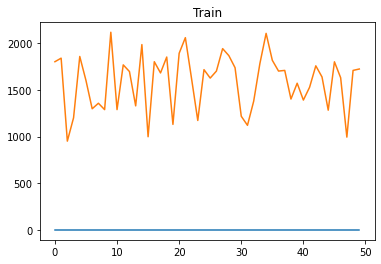

2/2 [==============================] - 1s 7ms/step


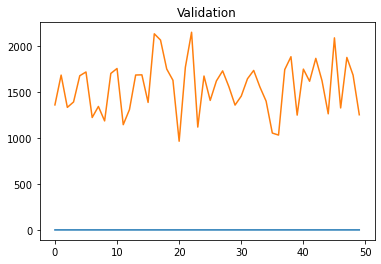

3/3 [==============================] - 0s 19ms/step


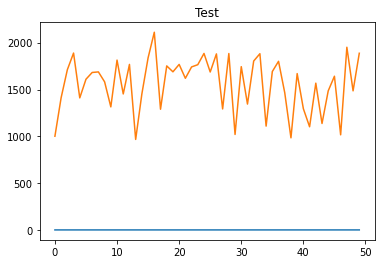

3/3 [==============================] - 0s 6ms/step


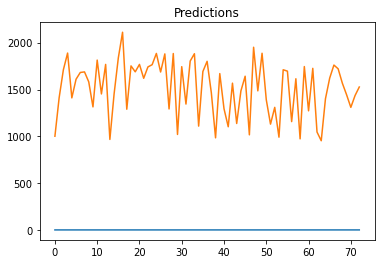

In [11]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 2519233.0000 - root_mean_squared_error: 1587.2092 INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 767ms/step - loss: 2540945.2500 - root_mean_squared_error: 1594.0343 - val_loss: 2512385.0000 - val_root_mean_squared_error: 1585.0504
Epoch 2/50
4/8 [==============>...............] - ETA: 0s - loss: 2550798.7500 - root_mean_squared_error: 1597.1221INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 619ms/step - loss: 2540309.0000 - root_mean_squared_error: 1593.8347 - val_loss: 2511665.7500 - val_root_mean_squared_error: 1584.8236
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2539782.2500 - root_mean_squared_error: 1593.6694INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 621ms/step - loss: 2539782.2500 - root_mean_squared_error: 1593.6694 - val_loss: 2511408.2500 - val_root_mean_squared_error: 1584.7423
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2539574.2500 - root_mean_squared_error: 1593.6041INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 741ms/step - loss: 2539574.2500 - root_mean_squared_error: 1593.6041 - val_loss: 2511234.2500 - val_root_mean_squared_error: 1584.6874
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 2524394.5000 - root_mean_squared_error: 1588.8344INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 670ms/step - loss: 2539406.7500 - root_mean_squared_error: 1593.5516 - val_loss: 2511069.2500 - val_root_mean_squared_error: 1584.6354
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 2627606.5000 - root_mean_squared_error: 1620.9894INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 623ms/step - loss: 2539242.5000 - root_mean_squared_error: 1593.5001 - val_loss: 2510906.7500 - val_root_mean_squared_error: 1584.5841
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 2293946.0000 - root_mean_squared_error: 1514.5779INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 683ms/step - loss: 2539080.5000 - root_mean_squared_error: 1593.4492 - val_loss: 2510744.0000 - val_root_mean_squared_error: 1584.5327
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2538918.2500 - root_mean_squared_error: 1593.3983INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 701ms/step - loss: 2538918.2500 - root_mean_squared_error: 1593.3983 - val_loss: 2510580.7500 - val_root_mean_squared_error: 1584.4812
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 2598208.5000 - root_mean_squared_error: 1611.8959INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 686ms/step - loss: 2538755.0000 - root_mean_squared_error: 1593.3470 - val_loss: 2510418.7500 - val_root_mean_squared_error: 1584.4302
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 2420864.2500 - root_mean_squared_error: 1555.9127INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 627ms/step - loss: 2538593.2500 - root_mean_squared_error: 1593.2964 - val_loss: 2510257.0000 - val_root_mean_squared_error: 1584.3790
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 2515519.5000 - root_mean_squared_error: 1586.0389INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 661ms/step - loss: 2538430.5000 - root_mean_squared_error: 1593.2452 - val_loss: 2510094.5000 - val_root_mean_squared_error: 1584.3278
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2538269.0000 - root_mean_squared_error: 1593.1946INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 839ms/step - loss: 2538269.0000 - root_mean_squared_error: 1593.1946 - val_loss: 2509931.2500 - val_root_mean_squared_error: 1584.2762
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2528762.2500 - root_mean_squared_error: 1590.2083INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 626ms/step - loss: 2538105.0000 - root_mean_squared_error: 1593.1431 - val_loss: 2509768.0000 - val_root_mean_squared_error: 1584.2247
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 2173161.0000 - root_mean_squared_error: 1474.1646INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 730ms/step - loss: 2537941.0000 - root_mean_squared_error: 1593.0917 - val_loss: 2509605.2500 - val_root_mean_squared_error: 1584.1733
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 2601297.2500 - root_mean_squared_error: 1612.8538INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 784ms/step - loss: 2537778.2500 - root_mean_squared_error: 1593.0405 - val_loss: 2509442.0000 - val_root_mean_squared_error: 1584.1218
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 2475967.2500 - root_mean_squared_error: 1573.5206INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 652ms/step - loss: 2537615.7500 - root_mean_squared_error: 1592.9896 - val_loss: 2509280.0000 - val_root_mean_squared_error: 1584.0707
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2537453.5000 - root_mean_squared_error: 1592.9386INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 764ms/step - loss: 2537453.5000 - root_mean_squared_error: 1592.9386 - val_loss: 2509118.0000 - val_root_mean_squared_error: 1584.0195
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2537292.5000 - root_mean_squared_error: 1592.8881INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 651ms/step - loss: 2537292.5000 - root_mean_squared_error: 1592.8881 - val_loss: 2508957.7500 - val_root_mean_squared_error: 1583.9690
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2523145.2500 - root_mean_squared_error: 1588.4412INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 597ms/step - loss: 2537132.2500 - root_mean_squared_error: 1592.8378 - val_loss: 2508797.0000 - val_root_mean_squared_error: 1583.9182
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 2493871.7500 - root_mean_squared_error: 1579.1997INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 568ms/step - loss: 2536969.5000 - root_mean_squared_error: 1592.7867 - val_loss: 2508634.7500 - val_root_mean_squared_error: 1583.8671
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 2610055.7500 - root_mean_squared_error: 1615.5667INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 562ms/step - loss: 2536807.7500 - root_mean_squared_error: 1592.7360 - val_loss: 2508471.2500 - val_root_mean_squared_error: 1583.8154
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2535714.7500 - root_mean_squared_error: 1592.3928INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 583ms/step - loss: 2536644.5000 - root_mean_squared_error: 1592.6847 - val_loss: 2508309.7500 - val_root_mean_squared_error: 1583.7644
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2531118.7500 - root_mean_squared_error: 1590.9490INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 511ms/step - loss: 2536483.5000 - root_mean_squared_error: 1592.6342 - val_loss: 2508147.2500 - val_root_mean_squared_error: 1583.7131
Epoch 24/50
5/8 [=================>............] - ETA: 0s - loss: 2506104.5000 - root_mean_squared_error: 1583.0681INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 681ms/step - loss: 2536320.7500 - root_mean_squared_error: 1592.5830 - val_loss: 2507985.0000 - val_root_mean_squared_error: 1583.6619
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2536158.2500 - root_mean_squared_error: 1592.5320INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 910ms/step - loss: 2536158.2500 - root_mean_squared_error: 1592.5320 - val_loss: 2507822.5000 - val_root_mean_squared_error: 1583.6106
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2539060.7500 - root_mean_squared_error: 1593.4430INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 646ms/step - loss: 2535996.0000 - root_mean_squared_error: 1592.4811 - val_loss: 2507660.2500 - val_root_mean_squared_error: 1583.5593
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2418202.5000 - root_mean_squared_error: 1555.0571INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 618ms/step - loss: 2535833.7500 - root_mean_squared_error: 1592.4302 - val_loss: 2507498.7500 - val_root_mean_squared_error: 1583.5084
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 2354698.2500 - root_mean_squared_error: 1534.5026INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 622ms/step - loss: 2535671.0000 - root_mean_squared_error: 1592.3790 - val_loss: 2507338.5000 - val_root_mean_squared_error: 1583.4578
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 2750946.0000 - root_mean_squared_error: 1658.5977INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 545ms/step - loss: 2535511.7500 - root_mean_squared_error: 1592.3290 - val_loss: 2507176.0000 - val_root_mean_squared_error: 1583.4065
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 2437806.0000 - root_mean_squared_error: 1561.3475INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 810ms/step - loss: 2535349.7500 - root_mean_squared_error: 1592.2782 - val_loss: 2507015.2500 - val_root_mean_squared_error: 1583.3557
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2601926.0000 - root_mean_squared_error: 1613.0487INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 541ms/step - loss: 2535189.0000 - root_mean_squared_error: 1592.2277 - val_loss: 2506854.5000 - val_root_mean_squared_error: 1583.3049
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2527369.2500 - root_mean_squared_error: 1589.7701INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 644ms/step - loss: 2535027.2500 - root_mean_squared_error: 1592.1769 - val_loss: 2506692.5000 - val_root_mean_squared_error: 1583.2538
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 2606035.2500 - root_mean_squared_error: 1614.3219INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 642ms/step - loss: 2534865.0000 - root_mean_squared_error: 1592.1260 - val_loss: 2506529.5000 - val_root_mean_squared_error: 1583.2023
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 2497208.0000 - root_mean_squared_error: 1580.2556INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 794ms/step - loss: 2534702.0000 - root_mean_squared_error: 1592.0747 - val_loss: 2506367.7500 - val_root_mean_squared_error: 1583.1512
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 2318836.5000 - root_mean_squared_error: 1522.7726INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 701ms/step - loss: 2534539.7500 - root_mean_squared_error: 1592.0238 - val_loss: 2506205.5000 - val_root_mean_squared_error: 1583.1000
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 2572113.7500 - root_mean_squared_error: 1603.7811INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 728ms/step - loss: 2534378.2500 - root_mean_squared_error: 1591.9730 - val_loss: 2506043.0000 - val_root_mean_squared_error: 1583.0486
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2534216.0000 - root_mean_squared_error: 1591.9221INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 696ms/step - loss: 2534216.0000 - root_mean_squared_error: 1591.9221 - val_loss: 2505880.2500 - val_root_mean_squared_error: 1582.9972
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 2236135.2500 - root_mean_squared_error: 1495.3712INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 850ms/step - loss: 2534052.2500 - root_mean_squared_error: 1591.8707 - val_loss: 2505718.5000 - val_root_mean_squared_error: 1582.9462
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 2571265.0000 - root_mean_squared_error: 1603.5165INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 553ms/step - loss: 2533890.7500 - root_mean_squared_error: 1591.8199 - val_loss: 2505556.2500 - val_root_mean_squared_error: 1582.8949
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 2597553.0000 - root_mean_squared_error: 1611.6926INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 845ms/step - loss: 2533727.7500 - root_mean_squared_error: 1591.7688 - val_loss: 2505394.5000 - val_root_mean_squared_error: 1582.8438
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 2546847.0000 - root_mean_squared_error: 1595.8844INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 785ms/step - loss: 2533566.5000 - root_mean_squared_error: 1591.7181 - val_loss: 2505232.2500 - val_root_mean_squared_error: 1582.7926
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 2556429.0000 - root_mean_squared_error: 1598.8837INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 821ms/step - loss: 2533404.7500 - root_mean_squared_error: 1591.6672 - val_loss: 2505070.2500 - val_root_mean_squared_error: 1582.7413
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2533243.5000 - root_mean_squared_error: 1591.6166INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 703ms/step - loss: 2533243.5000 - root_mean_squared_error: 1591.6166 - val_loss: 2504909.2500 - val_root_mean_squared_error: 1582.6906
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 2471156.5000 - root_mean_squared_error: 1571.9912INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 614ms/step - loss: 2533081.5000 - root_mean_squared_error: 1591.5658 - val_loss: 2504748.7500 - val_root_mean_squared_error: 1582.6398
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2536701.2500 - root_mean_squared_error: 1592.7025INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 639ms/step - loss: 2532921.5000 - root_mean_squared_error: 1591.5155 - val_loss: 2504588.5000 - val_root_mean_squared_error: 1582.5892
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 2549697.2500 - root_mean_squared_error: 1596.7771INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 570ms/step - loss: 2532761.7500 - root_mean_squared_error: 1591.4653 - val_loss: 2504427.2500 - val_root_mean_squared_error: 1582.5382
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 2423414.0000 - root_mean_squared_error: 1556.7318INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 684ms/step - loss: 2532600.5000 - root_mean_squared_error: 1591.4147 - val_loss: 2504266.5000 - val_root_mean_squared_error: 1582.4874
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 2635061.0000 - root_mean_squared_error: 1623.2871INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 514ms/step - loss: 2532438.0000 - root_mean_squared_error: 1591.3635 - val_loss: 2504104.7500 - val_root_mean_squared_error: 1582.4363
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2532277.0000 - root_mean_squared_error: 1591.3130INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 523ms/step - loss: 2532277.0000 - root_mean_squared_error: 1591.3130 - val_loss: 2503943.5000 - val_root_mean_squared_error: 1582.3854
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 2421805.0000 - root_mean_squared_error: 1556.2150INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 0s 3ms/step


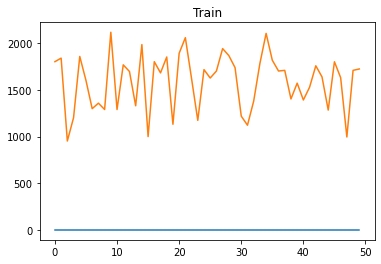

2/2 [==============================] - 0s 6ms/step


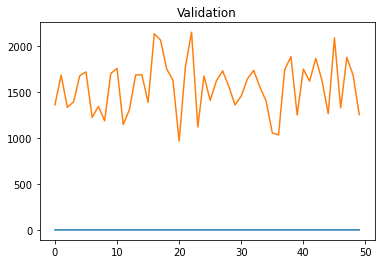

3/3 [==============================] - 0s 4ms/step


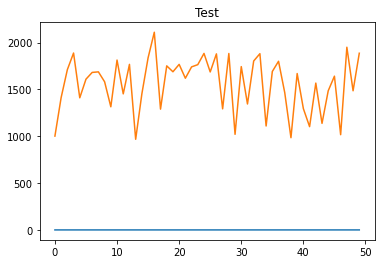

3/3 [==============================] - 0s 5ms/step


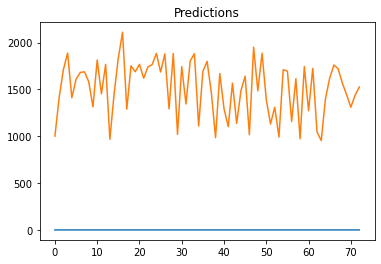

In [12]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 3004522.0000 - root_mean_squared_error: 1733.3557 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 588ms/step - loss: 3004522.0000 - root_mean_squared_error: 1733.3557 - val_loss: 2244431.7500 - val_root_mean_squared_error: 1498.1427
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 2450054.0000 - root_mean_squared_error: 1565.2649

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 433ms/step - loss: 2403560.5000 - root_mean_squared_error: 1550.3420 - val_loss: 1909851.6250 - val_root_mean_squared_error: 1381.9738
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2062967.2500 - root_mean_squared_error: 1436.3033

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 495ms/step - loss: 2087309.7500 - root_mean_squared_error: 1444.7524 - val_loss: 1582064.5000 - val_root_mean_squared_error: 1257.8015
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 1724488.6250 - root_mean_squared_error: 1313.1979

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 583ms/step - loss: 1714137.8750 - root_mean_squared_error: 1309.2509 - val_loss: 1278276.3750 - val_root_mean_squared_error: 1130.6089
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 1454525.3750 - root_mean_squared_error: 1206.0371

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 486ms/step - loss: 1452776.7500 - root_mean_squared_error: 1205.3119 - val_loss: 1012461.2500 - val_root_mean_squared_error: 1006.2114
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 1248481.6250 - root_mean_squared_error: 1117.3547

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 503ms/step - loss: 1255236.8750 - root_mean_squared_error: 1120.3735 - val_loss: 808496.0000 - val_root_mean_squared_error: 899.1641
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 967172.0000 - root_mean_squared_error: 983.4490  

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 519ms/step - loss: 961031.5000 - root_mean_squared_error: 980.3221 - val_loss: 627849.9375 - val_root_mean_squared_error: 792.3698
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 817703.1250 - root_mean_squared_error: 904.2694

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 464ms/step - loss: 783724.1875 - root_mean_squared_error: 885.2820 - val_loss: 475686.9375 - val_root_mean_squared_error: 689.7006
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 581283.3750 - root_mean_squared_error: 762.4194

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 483ms/step - loss: 581283.3750 - root_mean_squared_error: 762.4194 - val_loss: 351575.4375 - val_root_mean_squared_error: 592.9380
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 411602.0312 - root_mean_squared_error: 641.5622

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 496ms/step - loss: 415819.4375 - root_mean_squared_error: 644.8406 - val_loss: 253097.4062 - val_root_mean_squared_error: 503.0879
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 363744.7812 - root_mean_squared_error: 603.1125

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 541ms/step - loss: 361573.8438 - root_mean_squared_error: 601.3101 - val_loss: 176045.6562 - val_root_mean_squared_error: 419.5779
Epoch 12/50
5/8 [=================>............] - ETA: 0s - loss: 286872.2188 - root_mean_squared_error: 535.6046

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 472ms/step - loss: 266501.6875 - root_mean_squared_error: 516.2380 - val_loss: 118000.8203 - val_root_mean_squared_error: 343.5125
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 222624.6719 - root_mean_squared_error: 471.8312

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 491ms/step - loss: 223796.6250 - root_mean_squared_error: 473.0715 - val_loss: 75873.4922 - val_root_mean_squared_error: 275.4514
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 117467.7969 - root_mean_squared_error: 342.7357

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 555ms/step - loss: 162306.7344 - root_mean_squared_error: 402.8731 - val_loss: 47863.9922 - val_root_mean_squared_error: 218.7784
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 136080.3438 - root_mean_squared_error: 368.8907

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 502ms/step - loss: 136080.3438 - root_mean_squared_error: 368.8907 - val_loss: 29773.5430 - val_root_mean_squared_error: 172.5501
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 154198.4688 - root_mean_squared_error: 392.6811

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 455ms/step - loss: 145787.9375 - root_mean_squared_error: 381.8219 - val_loss: 17165.9004 - val_root_mean_squared_error: 131.0187
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 122821.0469 - root_mean_squared_error: 350.4583

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 377ms/step - loss: 122821.0469 - root_mean_squared_error: 350.4583 - val_loss: 9888.5693 - val_root_mean_squared_error: 99.4413
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 101519.3125 - root_mean_squared_error: 318.6209

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 338ms/step - loss: 116223.2500 - root_mean_squared_error: 340.9153 - val_loss: 6277.7090 - val_root_mean_squared_error: 79.2320
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 102274.8984 - root_mean_squared_error: 319.8045

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 502ms/step - loss: 104723.1797 - root_mean_squared_error: 323.6096 - val_loss: 4348.2417 - val_root_mean_squared_error: 65.9412
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 92726.1250 - root_mean_squared_error: 304.5096 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 432ms/step - loss: 94598.1719 - root_mean_squared_error: 307.5681 - val_loss: 3446.5618 - val_root_mean_squared_error: 58.7074
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 104456.5625 - root_mean_squared_error: 323.1974

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 510ms/step - loss: 93545.8750 - root_mean_squared_error: 305.8527 - val_loss: 3371.7881 - val_root_mean_squared_error: 58.0671
Epoch 22/50
8/8 [==============================] - 0s 27ms/step - loss: 99078.3359 - root_mean_squared_error: 314.7671 - val_loss: 3621.0701 - val_root_mean_squared_error: 60.1753
Epoch 23/50
8/8 [==============================] - 0s 35ms/step - loss: 74891.8125 - root_mean_squared_error: 273.6637 - val_loss: 3835.2166 - val_root_mean_squared_error: 61.9291
Epoch 24/50
8/8 [==============================] - 0s 31ms/step - loss: 84216.4922 - root_mean_squared_error: 290.2008 - val_loss: 3886.7937 - val_root_mean_squared_error: 62.3442
Epoch 25/50
8/8 [==============================] - 0s 37ms/step - loss: 81779.0625 - root_mean_squared_error: 285.9704 - val_loss: 3918.4290 - val_root_mean_squared_error: 62.5974
Epoch 26/50
8/8 [==============================] - 0s 21ms/step - loss: 94525.4297 - root_mean_squared_error: 3

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 462ms/step - loss: 97127.0469 - root_mean_squared_error: 311.6521 - val_loss: 3335.5813 - val_root_mean_squared_error: 57.7545
Epoch 32/50
8/8 [==============================] - 0s 28ms/step - loss: 99016.1562 - root_mean_squared_error: 314.6683 - val_loss: 3344.7161 - val_root_mean_squared_error: 57.8335
Epoch 33/50
8/8 [==============================] - 0s 26ms/step - loss: 93503.4297 - root_mean_squared_error: 305.7833 - val_loss: 3412.9846 - val_root_mean_squared_error: 58.4208
Epoch 34/50
8/8 [==============================] - 0s 27ms/step - loss: 108264.9453 - root_mean_squared_error: 329.0364 - val_loss: 3422.5334 - val_root_mean_squared_error: 58.5024
Epoch 35/50
8/8 [==============================] - 0s 23ms/step - loss: 89811.1406 - root_mean_squared_error: 299.6851 - val_loss: 3404.7776 - val_root_mean_squared_error: 58.3505
Epoch 36/50
8/8 [==============================] - 0s 16ms/step - loss: 77205.8359 - root_mean_squared_error: 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 399ms/step - loss: 73514.4062 - root_mean_squared_error: 271.1354 - val_loss: 3334.8774 - val_root_mean_squared_error: 57.7484
Epoch 41/50
8/8 [==============================] - 0s 25ms/step - loss: 87284.9375 - root_mean_squared_error: 295.4402 - val_loss: 3354.1548 - val_root_mean_squared_error: 57.9151
Epoch 42/50
8/8 [==============================] - 0s 31ms/step - loss: 84885.3828 - root_mean_squared_error: 291.3510 - val_loss: 3448.2715 - val_root_mean_squared_error: 58.7220
Epoch 43/50
8/8 [==============================] - 0s 31ms/step - loss: 79462.7891 - root_mean_squared_error: 281.8914 - val_loss: 3409.5435 - val_root_mean_squared_error: 58.3913
Epoch 44/50
8/8 [==============================] - 0s 27ms/step - loss: 68311.6953 - root_mean_squared_error: 261.3651 - val_loss: 3339.2449 - val_root_mean_squared_error: 57.7862
Epoch 45/50
8/8 [==============================] - 0s 40ms/step - loss: 91522.7266 - root_mean_squared_error: 3

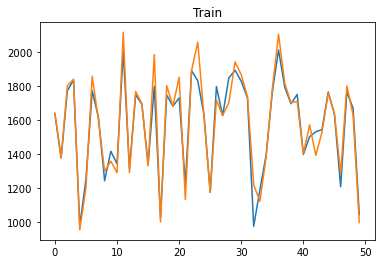

2/2 [==============================] - 0s 12ms/step


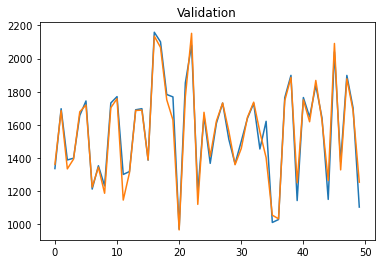

3/3 [==============================] - 0s 3ms/step


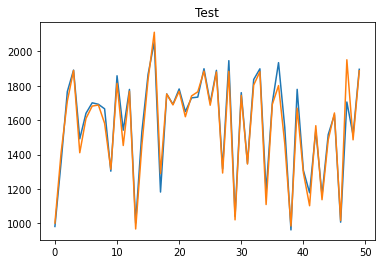

3/3 [==============================] - 0s 4ms/step


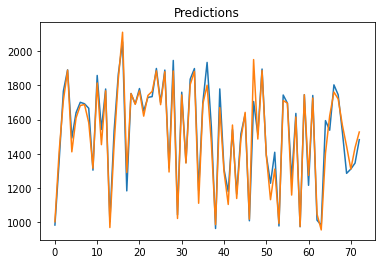

In [13]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [14]:
auto_cnn_mse

4047.9586257750857

### GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2534908.5000 - root_mean_squared_error: 1592.1396 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 2s/step - loss: 2535209.0000 - root_mean_squared_error: 1592.2340 - val_loss: 2508976.0000 - val_root_mean_squared_error: 1583.9747
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 2553193.2500 - root_mean_squared_error: 1597.8715

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2535106.7500 - root_mean_squared_error: 1592.2019 - val_loss: 2508581.7500 - val_root_mean_squared_error: 1583.8503
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2534515.0000 - root_mean_squared_error: 1592.0160

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2534515.0000 - root_mean_squared_error: 1592.0160 - val_loss: 2508242.7500 - val_root_mean_squared_error: 1583.7433
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 2610727.0000 - root_mean_squared_error: 1615.7744

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2534449.2500 - root_mean_squared_error: 1591.9954 - val_loss: 2507931.5000 - val_root_mean_squared_error: 1583.6450
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2533207.5000 - root_mean_squared_error: 1591.6053

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2533814.5000 - root_mean_squared_error: 1591.7960 - val_loss: 2507372.7500 - val_root_mean_squared_error: 1583.4686
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2546306.2500 - root_mean_squared_error: 1595.7150

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2533160.5000 - root_mean_squared_error: 1591.5906 - val_loss: 2506818.7500 - val_root_mean_squared_error: 1583.2936
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2533205.5000 - root_mean_squared_error: 1591.6047

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2532574.0000 - root_mean_squared_error: 1591.4062 - val_loss: 2505636.2500 - val_root_mean_squared_error: 1582.9202
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 2336294.0000 - root_mean_squared_error: 1528.4940

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2531650.5000 - root_mean_squared_error: 1591.1161 - val_loss: 2505021.0000 - val_root_mean_squared_error: 1582.7258
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 2465253.2500 - root_mean_squared_error: 1570.1125

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2530911.5000 - root_mean_squared_error: 1590.8839 - val_loss: 2504678.2500 - val_root_mean_squared_error: 1582.6176
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2509010.2500 - root_mean_squared_error: 1583.9856

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2531077.2500 - root_mean_squared_error: 1590.9359 - val_loss: 2504551.0000 - val_root_mean_squared_error: 1582.5773
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2530770.7500 - root_mean_squared_error: 1590.8396

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2530770.7500 - root_mean_squared_error: 1590.8396 - val_loss: 2504432.2500 - val_root_mean_squared_error: 1582.5398
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2568878.5000 - root_mean_squared_error: 1602.7721

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2530361.7500 - root_mean_squared_error: 1590.7111 - val_loss: 2504315.2500 - val_root_mean_squared_error: 1582.5028
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2523404.2500 - root_mean_squared_error: 1588.5227

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2530445.0000 - root_mean_squared_error: 1590.7373 - val_loss: 2504199.7500 - val_root_mean_squared_error: 1582.4663
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2547008.0000 - root_mean_squared_error: 1595.9348

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2530132.0000 - root_mean_squared_error: 1590.6389 - val_loss: 2504085.0000 - val_root_mean_squared_error: 1582.4301
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 2578516.7500 - root_mean_squared_error: 1605.7760

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2530015.0000 - root_mean_squared_error: 1590.6021 - val_loss: 2503969.7500 - val_root_mean_squared_error: 1582.3937
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2516248.5000 - root_mean_squared_error: 1586.2687

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2530068.2500 - root_mean_squared_error: 1590.6188 - val_loss: 2503855.0000 - val_root_mean_squared_error: 1582.3574
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 2532397.7500 - root_mean_squared_error: 1591.3510

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2530019.5000 - root_mean_squared_error: 1590.6035 - val_loss: 2503739.0000 - val_root_mean_squared_error: 1582.3208
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 2642111.0000 - root_mean_squared_error: 1625.4572

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2529672.7500 - root_mean_squared_error: 1590.4945 - val_loss: 2503623.5000 - val_root_mean_squared_error: 1582.2843
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2529741.7500 - root_mean_squared_error: 1590.5162

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2529741.7500 - root_mean_squared_error: 1590.5162 - val_loss: 2503507.0000 - val_root_mean_squared_error: 1582.2474
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2529446.2500 - root_mean_squared_error: 1590.4233

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2529446.2500 - root_mean_squared_error: 1590.4233 - val_loss: 2503392.5000 - val_root_mean_squared_error: 1582.2113
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 2644465.5000 - root_mean_squared_error: 1626.1813

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2529536.5000 - root_mean_squared_error: 1590.4517 - val_loss: 2503277.7500 - val_root_mean_squared_error: 1582.1750
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 2543021.0000 - root_mean_squared_error: 1594.6852

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2529467.2500 - root_mean_squared_error: 1590.4299 - val_loss: 2503162.2500 - val_root_mean_squared_error: 1582.1385
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2531094.5000 - root_mean_squared_error: 1590.9414

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2529254.5000 - root_mean_squared_error: 1590.3630 - val_loss: 2503047.2500 - val_root_mean_squared_error: 1582.1022
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2528927.2500 - root_mean_squared_error: 1590.2601

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2528927.2500 - root_mean_squared_error: 1590.2601 - val_loss: 2502932.7500 - val_root_mean_squared_error: 1582.0659
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2529088.7500 - root_mean_squared_error: 1590.3109

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2529088.7500 - root_mean_squared_error: 1590.3109 - val_loss: 2502817.7500 - val_root_mean_squared_error: 1582.0297
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 2547222.7500 - root_mean_squared_error: 1596.0021

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2529060.2500 - root_mean_squared_error: 1590.3019 - val_loss: 2502702.5000 - val_root_mean_squared_error: 1581.9932
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2528896.0000 - root_mean_squared_error: 1590.2502

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2528896.0000 - root_mean_squared_error: 1590.2502 - val_loss: 2502588.2500 - val_root_mean_squared_error: 1581.9572
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2506573.7500 - root_mean_squared_error: 1583.2163

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2528635.7500 - root_mean_squared_error: 1590.1685 - val_loss: 2502472.2500 - val_root_mean_squared_error: 1581.9204
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 2921555.2500 - root_mean_squared_error: 1709.2557

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2528661.5000 - root_mean_squared_error: 1590.1765 - val_loss: 2502357.0000 - val_root_mean_squared_error: 1581.8840
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2513748.5000 - root_mean_squared_error: 1585.4805

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2528517.5000 - root_mean_squared_error: 1590.1312 - val_loss: 2502242.0000 - val_root_mean_squared_error: 1581.8477
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2532752.7500 - root_mean_squared_error: 1591.4624

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2528281.7500 - root_mean_squared_error: 1590.0571 - val_loss: 2502127.2500 - val_root_mean_squared_error: 1581.8114
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2528107.5000 - root_mean_squared_error: 1590.0023

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2528107.5000 - root_mean_squared_error: 1590.0023 - val_loss: 2502012.2500 - val_root_mean_squared_error: 1581.7750
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2530592.5000 - root_mean_squared_error: 1590.7836

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2528470.2500 - root_mean_squared_error: 1590.1165 - val_loss: 2501899.0000 - val_root_mean_squared_error: 1581.7393
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2508063.7500 - root_mean_squared_error: 1583.6868

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2527814.7500 - root_mean_squared_error: 1589.9103 - val_loss: 2501785.5000 - val_root_mean_squared_error: 1581.7034
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2548910.7500 - root_mean_squared_error: 1596.5309

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2527750.0000 - root_mean_squared_error: 1589.8899 - val_loss: 2501671.0000 - val_root_mean_squared_error: 1581.6671
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 2847626.5000 - root_mean_squared_error: 1687.4912

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2527619.0000 - root_mean_squared_error: 1589.8488 - val_loss: 2501557.5000 - val_root_mean_squared_error: 1581.6312
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2515290.0000 - root_mean_squared_error: 1585.9666

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2527854.5000 - root_mean_squared_error: 1589.9229 - val_loss: 2501445.0000 - val_root_mean_squared_error: 1581.5957
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2527624.7500 - root_mean_squared_error: 1589.8506

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2527624.7500 - root_mean_squared_error: 1589.8506 - val_loss: 2501332.2500 - val_root_mean_squared_error: 1581.5601
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2527451.5000 - root_mean_squared_error: 1589.7960

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2527451.5000 - root_mean_squared_error: 1589.7960 - val_loss: 2501218.2500 - val_root_mean_squared_error: 1581.5240
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 2330508.0000 - root_mean_squared_error: 1526.6001

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2527406.2500 - root_mean_squared_error: 1589.7819 - val_loss: 2501104.5000 - val_root_mean_squared_error: 1581.4880
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2527053.0000 - root_mean_squared_error: 1589.6708

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2527053.0000 - root_mean_squared_error: 1589.6708 - val_loss: 2500990.2500 - val_root_mean_squared_error: 1581.4519
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2527011.0000 - root_mean_squared_error: 1589.6575

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2527011.0000 - root_mean_squared_error: 1589.6575 - val_loss: 2500876.5000 - val_root_mean_squared_error: 1581.4160
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2565139.0000 - root_mean_squared_error: 1601.6051

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2526989.5000 - root_mean_squared_error: 1589.6508 - val_loss: 2500762.0000 - val_root_mean_squared_error: 1581.3798
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 2442923.5000 - root_mean_squared_error: 1562.9855

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2526846.0000 - root_mean_squared_error: 1589.6056 - val_loss: 2500648.0000 - val_root_mean_squared_error: 1581.3438
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 2547920.7500 - root_mean_squared_error: 1596.2208

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2526851.5000 - root_mean_squared_error: 1589.6073 - val_loss: 2500533.7500 - val_root_mean_squared_error: 1581.3076
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2530559.5000 - root_mean_squared_error: 1590.7732

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2526707.7500 - root_mean_squared_error: 1589.5621 - val_loss: 2500419.2500 - val_root_mean_squared_error: 1581.2714
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2526639.7500 - root_mean_squared_error: 1589.5408

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2526639.7500 - root_mean_squared_error: 1589.5408 - val_loss: 2500304.2500 - val_root_mean_squared_error: 1581.2350
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 2500356.0000 - root_mean_squared_error: 1581.2513

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2526662.7500 - root_mean_squared_error: 1589.5480 - val_loss: 2500190.0000 - val_root_mean_squared_error: 1581.1989
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2663346.0000 - root_mean_squared_error: 1631.9761

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2526410.7500 - root_mean_squared_error: 1589.4688 - val_loss: 2500075.5000 - val_root_mean_squared_error: 1581.1628
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2526250.0000 - root_mean_squared_error: 1589.4181

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 2s 6ms/step


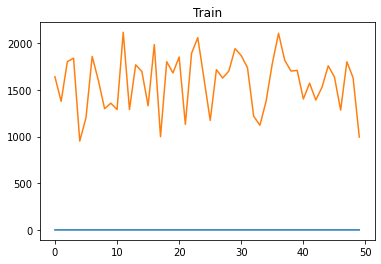

2/2 [==============================] - 1s 7ms/step


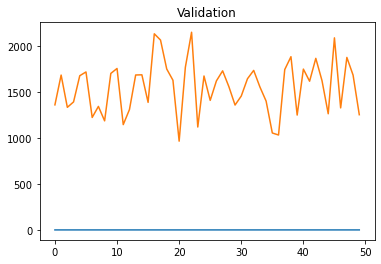

3/3 [==============================] - 0s 6ms/step


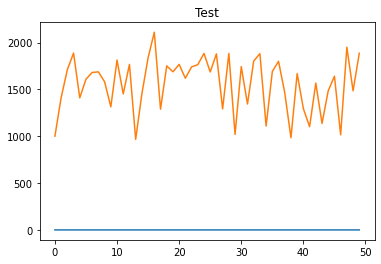

3/3 [==============================] - 0s 5ms/step


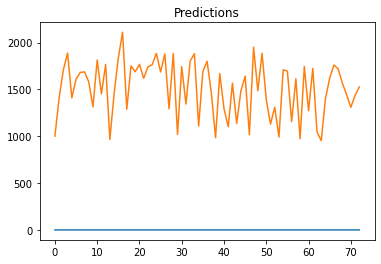

In [15]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [16]:
auto_gru_mse

2375065.261660685

### LSTM

Epoch 1/50
5/8 [=================>............] - ETA: 0s - loss: 2502555.5000 - root_mean_squared_error: 1581.9468 

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 3s/step - loss: 2531691.5000 - root_mean_squared_error: 1591.1290 - val_loss: 2504870.5000 - val_root_mean_squared_error: 1582.6782
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 2551042.2500 - root_mean_squared_error: 1597.1982

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2531050.0000 - root_mean_squared_error: 1590.9274 - val_loss: 2504073.0000 - val_root_mean_squared_error: 1582.4263
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 2525033.7500 - root_mean_squared_error: 1589.0355

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2530394.7500 - root_mean_squared_error: 1590.7214 - val_loss: 2503936.2500 - val_root_mean_squared_error: 1582.3831
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2530078.2500 - root_mean_squared_error: 1590.6219

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2530078.2500 - root_mean_squared_error: 1590.6219 - val_loss: 2503806.2500 - val_root_mean_squared_error: 1582.3420
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2514540.0000 - root_mean_squared_error: 1585.7301

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2529933.7500 - root_mean_squared_error: 1590.5765 - val_loss: 2503766.2500 - val_root_mean_squared_error: 1582.3293
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2517333.0000 - root_mean_squared_error: 1586.6106

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2529981.0000 - root_mean_squared_error: 1590.5914 - val_loss: 2503728.7500 - val_root_mean_squared_error: 1582.3175
Epoch 7/50
4/8 [==============>...............] - ETA: 0s - loss: 2527782.5000 - root_mean_squared_error: 1589.9001

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2529855.5000 - root_mean_squared_error: 1590.5520 - val_loss: 2503635.7500 - val_root_mean_squared_error: 1582.2881
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 2527548.0000 - root_mean_squared_error: 1589.8264

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2529783.7500 - root_mean_squared_error: 1590.5294 - val_loss: 2503513.0000 - val_root_mean_squared_error: 1582.2494
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2520722.7500 - root_mean_squared_error: 1587.6785

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2529687.0000 - root_mean_squared_error: 1590.4990 - val_loss: 2503481.5000 - val_root_mean_squared_error: 1582.2394
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2494438.2500 - root_mean_squared_error: 1579.3790

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2529663.7500 - root_mean_squared_error: 1590.4917 - val_loss: 2503447.2500 - val_root_mean_squared_error: 1582.2285
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2542446.2500 - root_mean_squared_error: 1594.5050

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2529612.5000 - root_mean_squared_error: 1590.4756 - val_loss: 2503376.0000 - val_root_mean_squared_error: 1582.2061
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2567940.5000 - root_mean_squared_error: 1602.4795

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2529531.2500 - root_mean_squared_error: 1590.4501 - val_loss: 2503322.0000 - val_root_mean_squared_error: 1582.1890
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2514366.7500 - root_mean_squared_error: 1585.6755

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2529411.0000 - root_mean_squared_error: 1590.4122 - val_loss: 2503299.7500 - val_root_mean_squared_error: 1582.1819
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2544730.7500 - root_mean_squared_error: 1595.2212

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2529346.7500 - root_mean_squared_error: 1590.3920 - val_loss: 2503274.0000 - val_root_mean_squared_error: 1582.1738
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2534136.0000 - root_mean_squared_error: 1591.8970

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2529267.0000 - root_mean_squared_error: 1590.3669 - val_loss: 2503248.7500 - val_root_mean_squared_error: 1582.1658
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2529238.2500 - root_mean_squared_error: 1590.3579

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2529238.2500 - root_mean_squared_error: 1590.3579 - val_loss: 2503218.2500 - val_root_mean_squared_error: 1582.1562
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2529248.7500 - root_mean_squared_error: 1590.3612

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2529248.7500 - root_mean_squared_error: 1590.3612 - val_loss: 2503154.0000 - val_root_mean_squared_error: 1582.1359
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2529141.0000 - root_mean_squared_error: 1590.3273

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2529141.0000 - root_mean_squared_error: 1590.3273 - val_loss: 2503065.5000 - val_root_mean_squared_error: 1582.1079
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2521265.7500 - root_mean_squared_error: 1587.8494

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2529015.7500 - root_mean_squared_error: 1590.2880 - val_loss: 2503023.0000 - val_root_mean_squared_error: 1582.0945
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 2506289.5000 - root_mean_squared_error: 1583.1265

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2528970.0000 - root_mean_squared_error: 1590.2736 - val_loss: 2502951.5000 - val_root_mean_squared_error: 1582.0719
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2528903.5000 - root_mean_squared_error: 1590.2527

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 2528903.5000 - root_mean_squared_error: 1590.2527 - val_loss: 2502880.2500 - val_root_mean_squared_error: 1582.0494
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 2648923.2500 - root_mean_squared_error: 1627.5513

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2528930.2500 - root_mean_squared_error: 1590.2611 - val_loss: 2502810.7500 - val_root_mean_squared_error: 1582.0275
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 2603377.2500 - root_mean_squared_error: 1613.4984

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2528860.2500 - root_mean_squared_error: 1590.2390 - val_loss: 2502743.2500 - val_root_mean_squared_error: 1582.0061
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2525436.7500 - root_mean_squared_error: 1589.1622

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2528753.7500 - root_mean_squared_error: 1590.2056 - val_loss: 2502674.7500 - val_root_mean_squared_error: 1581.9844
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2531922.7500 - root_mean_squared_error: 1591.2017

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2528685.5000 - root_mean_squared_error: 1590.1841 - val_loss: 2502605.5000 - val_root_mean_squared_error: 1581.9625
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2512012.2500 - root_mean_squared_error: 1584.9329

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2528586.2500 - root_mean_squared_error: 1590.1530 - val_loss: 2502536.2500 - val_root_mean_squared_error: 1581.9407
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2509652.0000 - root_mean_squared_error: 1584.1881

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2528582.2500 - root_mean_squared_error: 1590.1516 - val_loss: 2502467.2500 - val_root_mean_squared_error: 1581.9188
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 2463787.0000 - root_mean_squared_error: 1569.6455

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2528522.5000 - root_mean_squared_error: 1590.1328 - val_loss: 2502398.2500 - val_root_mean_squared_error: 1581.8971
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2528463.5000 - root_mean_squared_error: 1590.1143

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2528463.5000 - root_mean_squared_error: 1590.1143 - val_loss: 2502329.5000 - val_root_mean_squared_error: 1581.8754
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 2617530.5000 - root_mean_squared_error: 1617.8784

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2528479.0000 - root_mean_squared_error: 1590.1191 - val_loss: 2502260.7500 - val_root_mean_squared_error: 1581.8536
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2528315.5000 - root_mean_squared_error: 1590.0677

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2528315.5000 - root_mean_squared_error: 1590.0677 - val_loss: 2502193.0000 - val_root_mean_squared_error: 1581.8320
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 2452878.5000 - root_mean_squared_error: 1566.1669

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2528356.7500 - root_mean_squared_error: 1590.0807 - val_loss: 2502124.7500 - val_root_mean_squared_error: 1581.8105
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 2527301.2500 - root_mean_squared_error: 1589.7488

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2528132.0000 - root_mean_squared_error: 1590.0100 - val_loss: 2502054.5000 - val_root_mean_squared_error: 1581.7883
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2564035.7500 - root_mean_squared_error: 1601.2606

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2528197.0000 - root_mean_squared_error: 1590.0305 - val_loss: 2501982.5000 - val_root_mean_squared_error: 1581.7656
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2524147.5000 - root_mean_squared_error: 1588.7566

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2528115.0000 - root_mean_squared_error: 1590.0048 - val_loss: 2501908.2500 - val_root_mean_squared_error: 1581.7422
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2526818.0000 - root_mean_squared_error: 1589.5968

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2527928.2500 - root_mean_squared_error: 1589.9460 - val_loss: 2501821.2500 - val_root_mean_squared_error: 1581.7146
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2526536.7500 - root_mean_squared_error: 1589.5083

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2527881.7500 - root_mean_squared_error: 1589.9314 - val_loss: 2501720.0000 - val_root_mean_squared_error: 1581.6826
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2527899.5000 - root_mean_squared_error: 1589.9369

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2527899.5000 - root_mean_squared_error: 1589.9369 - val_loss: 2501629.5000 - val_root_mean_squared_error: 1581.6541
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 2460035.5000 - root_mean_squared_error: 1568.4501

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2527766.5000 - root_mean_squared_error: 1589.8951 - val_loss: 2501548.7500 - val_root_mean_squared_error: 1581.6285
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 2521317.0000 - root_mean_squared_error: 1587.8656

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2527746.0000 - root_mean_squared_error: 1589.8887 - val_loss: 2501471.2500 - val_root_mean_squared_error: 1581.6040
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 2508148.0000 - root_mean_squared_error: 1583.7134

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2527674.2500 - root_mean_squared_error: 1589.8661 - val_loss: 2501394.0000 - val_root_mean_squared_error: 1581.5796
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2544697.2500 - root_mean_squared_error: 1595.2107

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2527496.0000 - root_mean_squared_error: 1589.8101 - val_loss: 2501315.7500 - val_root_mean_squared_error: 1581.5548
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2537813.7500 - root_mean_squared_error: 1593.0518

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2527535.7500 - root_mean_squared_error: 1589.8225 - val_loss: 2501209.5000 - val_root_mean_squared_error: 1581.5212
Epoch 44/50
4/8 [==============>...............] - ETA: 0s - loss: 2555952.2500 - root_mean_squared_error: 1598.7346

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2527341.0000 - root_mean_squared_error: 1589.7614 - val_loss: 2501094.0000 - val_root_mean_squared_error: 1581.4847
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 2556229.5000 - root_mean_squared_error: 1598.8213

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2527190.2500 - root_mean_squared_error: 1589.7139 - val_loss: 2501014.0000 - val_root_mean_squared_error: 1581.4595
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2533428.0000 - root_mean_squared_error: 1591.6746

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2527255.5000 - root_mean_squared_error: 1589.7344 - val_loss: 2500935.5000 - val_root_mean_squared_error: 1581.4346
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 2535995.7500 - root_mean_squared_error: 1592.4810

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2527165.2500 - root_mean_squared_error: 1589.7061 - val_loss: 2500857.5000 - val_root_mean_squared_error: 1581.4099
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2526922.5000 - root_mean_squared_error: 1589.6296

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2526922.5000 - root_mean_squared_error: 1589.6296 - val_loss: 2500778.7500 - val_root_mean_squared_error: 1581.3851
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2623438.0000 - root_mean_squared_error: 1619.7030

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2526933.5000 - root_mean_squared_error: 1589.6332 - val_loss: 2500699.2500 - val_root_mean_squared_error: 1581.3600
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 2278637.0000 - root_mean_squared_error: 1509.5155

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 2s 5ms/step


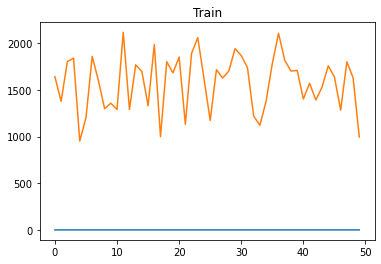

2/2 [==============================] - 1s 16ms/step


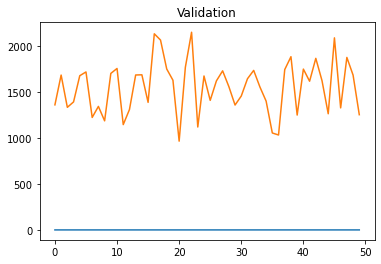

3/3 [==============================] - 0s 32ms/step


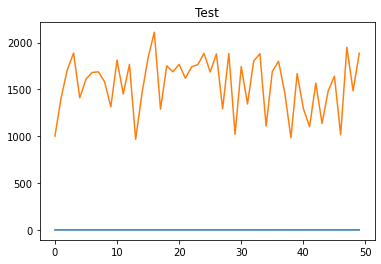

3/3 [==============================] - 0s 6ms/step


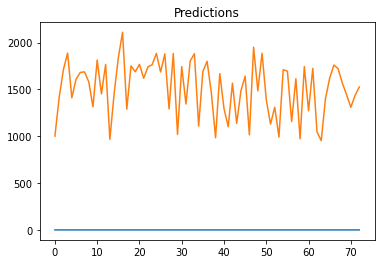

In [17]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [18]:
auto_lstm_mse

2375704.8853173805

### RNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2526552.0000 - root_mean_squared_error: 1589.5132 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 1s/step - loss: 2526552.0000 - root_mean_squared_error: 1589.5132 - val_loss: 2500059.0000 - val_root_mean_squared_error: 1581.1575
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 2485115.5000 - root_mean_squared_error: 1576.4249INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 710ms/step - loss: 2526299.5000 - root_mean_squared_error: 1589.4337 - val_loss: 2499899.2500 - val_root_mean_squared_error: 1581.1069
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 2665620.7500 - root_mean_squared_error: 1632.6729INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 770ms/step - loss: 2525741.2500 - root_mean_squared_error: 1589.2581 - val_loss: 2499739.7500 - val_root_mean_squared_error: 1581.0565
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2511412.7500 - root_mean_squared_error: 1584.7438INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 655ms/step - loss: 2525634.0000 - root_mean_squared_error: 1589.2244 - val_loss: 2499579.2500 - val_root_mean_squared_error: 1581.0057
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 2698444.5000 - root_mean_squared_error: 1642.6943INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2526078.2500 - root_mean_squared_error: 1589.3641 - val_loss: 2499420.5000 - val_root_mean_squared_error: 1580.9556
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 2542886.0000 - root_mean_squared_error: 1594.6429INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 689ms/step - loss: 2525316.2500 - root_mean_squared_error: 1589.1244 - val_loss: 2499261.0000 - val_root_mean_squared_error: 1580.9052
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2525135.5000 - root_mean_squared_error: 1589.0675INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 932ms/step - loss: 2525135.5000 - root_mean_squared_error: 1589.0675 - val_loss: 2499089.5000 - val_root_mean_squared_error: 1580.8508
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 2509975.5000 - root_mean_squared_error: 1584.2902INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 758ms/step - loss: 2525334.2500 - root_mean_squared_error: 1589.1300 - val_loss: 2498877.5000 - val_root_mean_squared_error: 1580.7838
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 2605314.5000 - root_mean_squared_error: 1614.0986INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 721ms/step - loss: 2525059.0000 - root_mean_squared_error: 1589.0435 - val_loss: 2498714.5000 - val_root_mean_squared_error: 1580.7323
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 2580139.5000 - root_mean_squared_error: 1606.2812INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 697ms/step - loss: 2524649.2500 - root_mean_squared_error: 1588.9144 - val_loss: 2498557.0000 - val_root_mean_squared_error: 1580.6825
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2524282.5000 - root_mean_squared_error: 1588.7991INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 804ms/step - loss: 2524282.5000 - root_mean_squared_error: 1588.7991 - val_loss: 2498398.2500 - val_root_mean_squared_error: 1580.6322
Epoch 12/50
2/8 [======>.......................] - ETA: 0s - loss: 2483038.0000 - root_mean_squared_error: 1575.7659INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2524396.0000 - root_mean_squared_error: 1588.8348 - val_loss: 2498238.5000 - val_root_mean_squared_error: 1580.5817
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2524627.0000 - root_mean_squared_error: 1588.9075INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 865ms/step - loss: 2524627.0000 - root_mean_squared_error: 1588.9075 - val_loss: 2498078.5000 - val_root_mean_squared_error: 1580.5311
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2517245.7500 - root_mean_squared_error: 1586.5830INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 827ms/step - loss: 2524508.0000 - root_mean_squared_error: 1588.8700 - val_loss: 2497920.2500 - val_root_mean_squared_error: 1580.4811
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 2568068.0000 - root_mean_squared_error: 1602.5193INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 777ms/step - loss: 2524197.7500 - root_mean_squared_error: 1588.7725 - val_loss: 2497762.2500 - val_root_mean_squared_error: 1580.4310
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2524532.2500 - root_mean_squared_error: 1588.8777INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2524332.0000 - root_mean_squared_error: 1588.8147 - val_loss: 2497603.2500 - val_root_mean_squared_error: 1580.3807
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 2492598.0000 - root_mean_squared_error: 1578.7964INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 751ms/step - loss: 2524015.7500 - root_mean_squared_error: 1588.7151 - val_loss: 2497446.2500 - val_root_mean_squared_error: 1580.3311
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2523712.2500 - root_mean_squared_error: 1588.6196INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 841ms/step - loss: 2523712.2500 - root_mean_squared_error: 1588.6196 - val_loss: 2497287.7500 - val_root_mean_squared_error: 1580.2809
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 2787800.5000 - root_mean_squared_error: 1669.6708INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 676ms/step - loss: 2523267.5000 - root_mean_squared_error: 1588.4796 - val_loss: 2497130.0000 - val_root_mean_squared_error: 1580.2310
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2520455.5000 - root_mean_squared_error: 1587.5942INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 779ms/step - loss: 2523161.5000 - root_mean_squared_error: 1588.4463 - val_loss: 2496971.5000 - val_root_mean_squared_error: 1580.1808
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2522704.2500 - root_mean_squared_error: 1588.3024INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 839ms/step - loss: 2522704.2500 - root_mean_squared_error: 1588.3024 - val_loss: 2496813.2500 - val_root_mean_squared_error: 1580.1307
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2526818.2500 - root_mean_squared_error: 1589.5969INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 668ms/step - loss: 2522776.5000 - root_mean_squared_error: 1588.3251 - val_loss: 2496653.5000 - val_root_mean_squared_error: 1580.0802
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2504909.7500 - root_mean_squared_error: 1582.6907INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 820ms/step - loss: 2522696.7500 - root_mean_squared_error: 1588.2999 - val_loss: 2496496.0000 - val_root_mean_squared_error: 1580.0304
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2509170.7500 - root_mean_squared_error: 1584.0363INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 920ms/step - loss: 2522165.5000 - root_mean_squared_error: 1588.1327 - val_loss: 2496337.7500 - val_root_mean_squared_error: 1579.9803
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 2614261.0000 - root_mean_squared_error: 1616.8677INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 742ms/step - loss: 2522371.2500 - root_mean_squared_error: 1588.1975 - val_loss: 2496178.2500 - val_root_mean_squared_error: 1579.9298
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2505396.2500 - root_mean_squared_error: 1582.8444INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 939ms/step - loss: 2522089.5000 - root_mean_squared_error: 1588.1088 - val_loss: 2496019.5000 - val_root_mean_squared_error: 1579.8796
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2389266.0000 - root_mean_squared_error: 1545.7251INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 714ms/step - loss: 2522032.7500 - root_mean_squared_error: 1588.0909 - val_loss: 2495860.2500 - val_root_mean_squared_error: 1579.8292
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2522123.2500 - root_mean_squared_error: 1588.1194INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 842ms/step - loss: 2522123.2500 - root_mean_squared_error: 1588.1194 - val_loss: 2495701.5000 - val_root_mean_squared_error: 1579.7791
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 2421436.2500 - root_mean_squared_error: 1556.0964INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 764ms/step - loss: 2521814.7500 - root_mean_squared_error: 1588.0222 - val_loss: 2495544.2500 - val_root_mean_squared_error: 1579.7291
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 2491589.7500 - root_mean_squared_error: 1578.4771INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 804ms/step - loss: 2521856.7500 - root_mean_squared_error: 1588.0355 - val_loss: 2495385.5000 - val_root_mean_squared_error: 1579.6790
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2521514.0000 - root_mean_squared_error: 1587.9276INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 872ms/step - loss: 2521514.0000 - root_mean_squared_error: 1587.9276 - val_loss: 2495224.7500 - val_root_mean_squared_error: 1579.6281
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2513968.2500 - root_mean_squared_error: 1585.5498INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2520605.7500 - root_mean_squared_error: 1587.6416 - val_loss: 2495064.0000 - val_root_mean_squared_error: 1579.5771
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2521213.2500 - root_mean_squared_error: 1587.8329INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 747ms/step - loss: 2521213.2500 - root_mean_squared_error: 1587.8329 - val_loss: 2494903.2500 - val_root_mean_squared_error: 1579.5262
Epoch 34/50
5/8 [=================>............] - ETA: 0s - loss: 2562072.7500 - root_mean_squared_error: 1600.6476INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 986ms/step - loss: 2521158.7500 - root_mean_squared_error: 1587.8157 - val_loss: 2494744.0000 - val_root_mean_squared_error: 1579.4758
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2527205.5000 - root_mean_squared_error: 1589.7186INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 841ms/step - loss: 2520920.0000 - root_mean_squared_error: 1587.7405 - val_loss: 2494585.7500 - val_root_mean_squared_error: 1579.4258
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 2509166.0000 - root_mean_squared_error: 1584.0347INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2520849.0000 - root_mean_squared_error: 1587.7181 - val_loss: 2494427.5000 - val_root_mean_squared_error: 1579.3756
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2410753.5000 - root_mean_squared_error: 1552.6602INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 840ms/step - loss: 2520575.7500 - root_mean_squared_error: 1587.6321 - val_loss: 2494268.7500 - val_root_mean_squared_error: 1579.3254
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 2784869.7500 - root_mean_squared_error: 1668.7928INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 789ms/step - loss: 2520159.2500 - root_mean_squared_error: 1587.5010 - val_loss: 2494110.2500 - val_root_mean_squared_error: 1579.2753
Epoch 39/50
5/8 [=================>............] - ETA: 0s - loss: 2488321.2500 - root_mean_squared_error: 1577.4414INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 818ms/step - loss: 2520196.5000 - root_mean_squared_error: 1587.5127 - val_loss: 2493952.0000 - val_root_mean_squared_error: 1579.2251
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 2635119.2500 - root_mean_squared_error: 1623.3051INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 912ms/step - loss: 2519693.7500 - root_mean_squared_error: 1587.3544 - val_loss: 2493791.5000 - val_root_mean_squared_error: 1579.1743
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 2637435.0000 - root_mean_squared_error: 1624.0182INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 676ms/step - loss: 2519890.5000 - root_mean_squared_error: 1587.4163 - val_loss: 2493631.5000 - val_root_mean_squared_error: 1579.1237
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2519889.5000 - root_mean_squared_error: 1587.4160INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 646ms/step - loss: 2519889.5000 - root_mean_squared_error: 1587.4160 - val_loss: 2493470.5000 - val_root_mean_squared_error: 1579.0726
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2582169.2500 - root_mean_squared_error: 1606.9130INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 748ms/step - loss: 2519660.5000 - root_mean_squared_error: 1587.3439 - val_loss: 2493311.5000 - val_root_mean_squared_error: 1579.0223
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 2313150.2500 - root_mean_squared_error: 1520.9044INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 888ms/step - loss: 2519209.0000 - root_mean_squared_error: 1587.2017 - val_loss: 2493152.5000 - val_root_mean_squared_error: 1578.9719
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 2530426.2500 - root_mean_squared_error: 1590.7313INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 875ms/step - loss: 2519317.5000 - root_mean_squared_error: 1587.2358 - val_loss: 2492993.0000 - val_root_mean_squared_error: 1578.9215
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2519547.7500 - root_mean_squared_error: 1587.3083INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 941ms/step - loss: 2519547.7500 - root_mean_squared_error: 1587.3083 - val_loss: 2492834.2500 - val_root_mean_squared_error: 1578.8712
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2531761.7500 - root_mean_squared_error: 1591.1511INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 839ms/step - loss: 2518792.5000 - root_mean_squared_error: 1587.0704 - val_loss: 2492674.7500 - val_root_mean_squared_error: 1578.8207
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2519071.0000 - root_mean_squared_error: 1587.1582INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2519071.0000 - root_mean_squared_error: 1587.1582 - val_loss: 2492517.0000 - val_root_mean_squared_error: 1578.7708
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 2576516.2500 - root_mean_squared_error: 1605.1531INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 785ms/step - loss: 2518401.7500 - root_mean_squared_error: 1586.9473 - val_loss: 2492358.5000 - val_root_mean_squared_error: 1578.7206
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 2280117.5000 - root_mean_squared_error: 1510.0057INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 2s 19ms/step


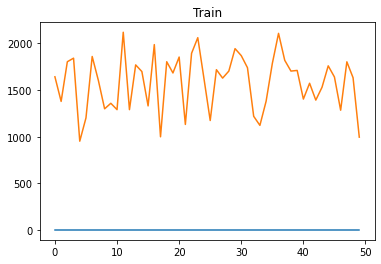

2/2 [==============================] - 1s 5ms/step


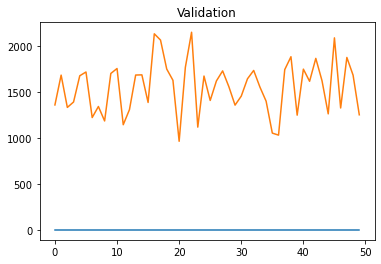

3/3 [==============================] - 0s 5ms/step


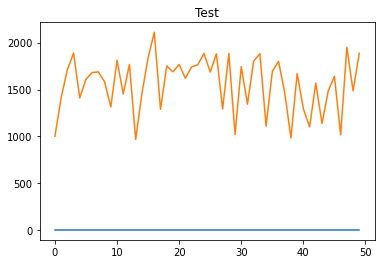

3/3 [==============================] - 0s 4ms/step


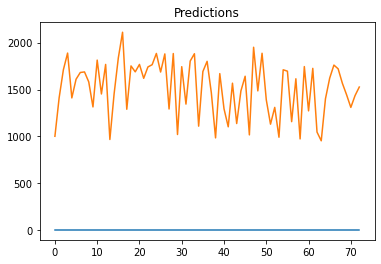

In [19]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [20]:
auto_rnn_mse

2367523.3122345326

# Moving Average with Encoder

### CNN

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 2183684.5000 - root_mean_squared_error: 1477.7295 

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 837ms/step - loss: 2183684.5000 - root_mean_squared_error: 1477.7295 - val_loss: 2122700.2500 - val_root_mean_squared_error: 1456.9490
Epoch 2/10
7/8 [=========================>....] - ETA: 0s - loss: 2000851.3750 - root_mean_squared_error: 1414.5145

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 449ms/step - loss: 2003850.0000 - root_mean_squared_error: 1415.5741 - val_loss: 1786028.3750 - val_root_mean_squared_error: 1336.4237
Epoch 3/10
5/8 [=================>............] - ETA: 0s - loss: 1674707.7500 - root_mean_squared_error: 1294.1050

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 501ms/step - loss: 1681399.8750 - root_mean_squared_error: 1296.6880 - val_loss: 1469367.0000 - val_root_mean_squared_error: 1212.1744
Epoch 4/10
7/8 [=========================>....] - ETA: 0s - loss: 1478182.2500 - root_mean_squared_error: 1215.8052

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 407ms/step - loss: 1476160.5000 - root_mean_squared_error: 1214.9735 - val_loss: 1170007.5000 - val_root_mean_squared_error: 1081.6688
Epoch 5/10
7/8 [=========================>....] - ETA: 0s - loss: 1285152.0000 - root_mean_squared_error: 1133.6455

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 383ms/step - loss: 1283341.7500 - root_mean_squared_error: 1132.8468 - val_loss: 905878.6250 - val_root_mean_squared_error: 951.7766
Epoch 6/10
1/8 [==>...........................] - ETA: 0s - loss: 1103466.5000 - root_mean_squared_error: 1050.4601

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 507ms/step - loss: 990535.6250 - root_mean_squared_error: 995.2566 - val_loss: 677200.2500 - val_root_mean_squared_error: 822.9218
Epoch 7/10
6/8 [=====================>........] - ETA: 0s - loss: 706721.8125 - root_mean_squared_error: 840.6675

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 443ms/step - loss: 720346.0000 - root_mean_squared_error: 848.7320 - val_loss: 492527.0312 - val_root_mean_squared_error: 701.8027
Epoch 8/10
7/8 [=========================>....] - ETA: 0s - loss: 727872.3125 - root_mean_squared_error: 853.1544

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 469ms/step - loss: 722369.3750 - root_mean_squared_error: 849.9232 - val_loss: 340717.1875 - val_root_mean_squared_error: 583.7098
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 573197.8125 - root_mean_squared_error: 757.0983

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 432ms/step - loss: 573197.8125 - root_mean_squared_error: 757.0983 - val_loss: 224659.9062 - val_root_mean_squared_error: 473.9830
Epoch 10/10
8/8 [==============================] - ETA: 0s - loss: 398077.7188 - root_mean_squared_error: 630.9340

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 21ms/step


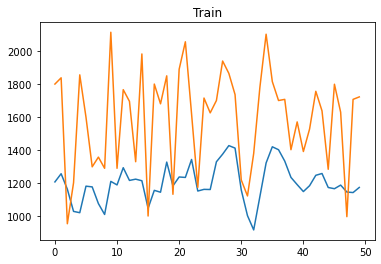

2/2 [==============================] - 1s 8ms/step


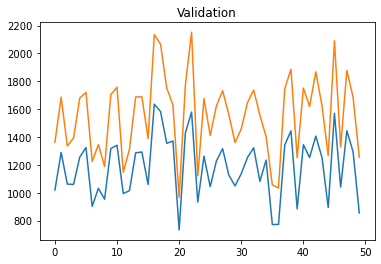

3/3 [==============================] - 0s 12ms/step


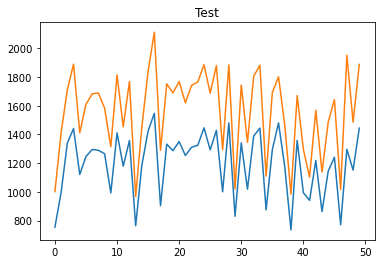

3/3 [==============================] - 0s 4ms/step


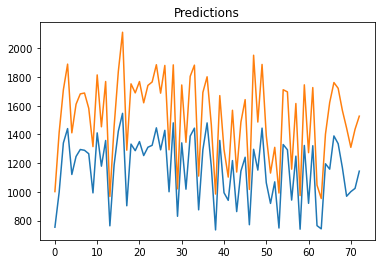

In [21]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [22]:
mavg_auto_cnn_mse

132212.48602531385

### RNN

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 2536091.7500 - root_mean_squared_error: 1592.5111 INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 734ms/step - loss: 2536091.7500 - root_mean_squared_error: 1592.5111 - val_loss: 2508121.0000 - val_root_mean_squared_error: 1583.7048
Epoch 2/10
4/8 [==============>...............] - ETA: 0s - loss: 2549485.7500 - root_mean_squared_error: 1596.7109INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 809ms/step - loss: 2536449.0000 - root_mean_squared_error: 1592.6233 - val_loss: 2507736.2500 - val_root_mean_squared_error: 1583.5834
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 2535227.0000 - root_mean_squared_error: 1592.2396INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2535227.0000 - root_mean_squared_error: 1592.2396 - val_loss: 2507367.2500 - val_root_mean_squared_error: 1583.4668
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 2535422.0000 - root_mean_squared_error: 1592.3009INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 888ms/step - loss: 2535422.0000 - root_mean_squared_error: 1592.3009 - val_loss: 2507093.0000 - val_root_mean_squared_error: 1583.3802
Epoch 5/10
7/8 [=========================>....] - ETA: 0s - loss: 2528144.2500 - root_mean_squared_error: 1590.0139INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 887ms/step - loss: 2535436.0000 - root_mean_squared_error: 1592.3053 - val_loss: 2506921.5000 - val_root_mean_squared_error: 1583.3260
Epoch 6/10
7/8 [=========================>....] - ETA: 0s - loss: 2537616.2500 - root_mean_squared_error: 1592.9897INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 704ms/step - loss: 2535256.0000 - root_mean_squared_error: 1592.2488 - val_loss: 2506759.5000 - val_root_mean_squared_error: 1583.2749
Epoch 7/10
7/8 [=========================>....] - ETA: 0s - loss: 2538509.2500 - root_mean_squared_error: 1593.2700INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2535152.7500 - root_mean_squared_error: 1592.2163 - val_loss: 2506598.5000 - val_root_mean_squared_error: 1583.2241
Epoch 8/10
8/8 [==============================] - ETA: 0s - loss: 2534844.0000 - root_mean_squared_error: 1592.1194INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 677ms/step - loss: 2534844.0000 - root_mean_squared_error: 1592.1194 - val_loss: 2506437.5000 - val_root_mean_squared_error: 1583.1732
Epoch 9/10
5/8 [=================>............] - ETA: 0s - loss: 2454375.5000 - root_mean_squared_error: 1566.6447INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 872ms/step - loss: 2534897.2500 - root_mean_squared_error: 1592.1361 - val_loss: 2506276.5000 - val_root_mean_squared_error: 1583.1224
Epoch 10/10
8/8 [==============================] - ETA: 0s - loss: 2534638.0000 - root_mean_squared_error: 1592.0547INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 3ms/step


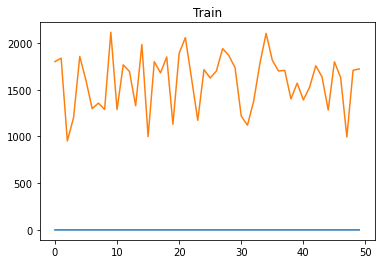

2/2 [==============================] - 1s 4ms/step


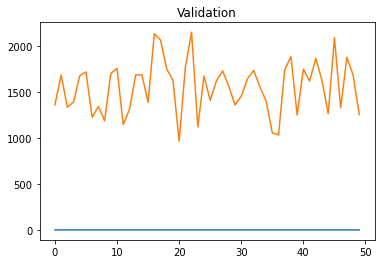

3/3 [==============================] - 0s 116ms/step


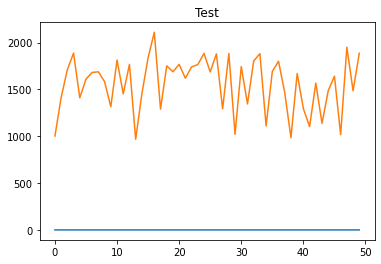

3/3 [==============================] - 0s 4ms/step


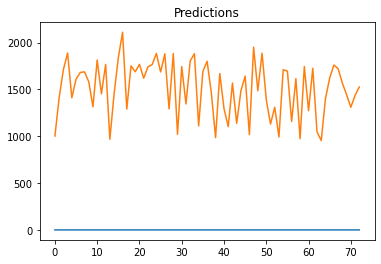

In [23]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [24]:
mavg_auto_rnn_mse

2381046.323007591

### GRU

Epoch 1/10
7/8 [=========================>....] - ETA: 0s - loss: 2529312.5000 - root_mean_squared_error: 1590.3812 

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 3s/step - loss: 2528993.5000 - root_mean_squared_error: 1590.2810 - val_loss: 2500698.2500 - val_root_mean_squared_error: 1581.3596
Epoch 2/10
4/8 [==============>...............] - ETA: 0s - loss: 2573877.0000 - root_mean_squared_error: 1604.3307

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2529040.0000 - root_mean_squared_error: 1590.2955 - val_loss: 2500589.5000 - val_root_mean_squared_error: 1581.3252
Epoch 3/10
6/8 [=====================>........] - ETA: 0s - loss: 2504964.2500 - root_mean_squared_error: 1582.7079

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2528769.0000 - root_mean_squared_error: 1590.2103 - val_loss: 2500493.7500 - val_root_mean_squared_error: 1581.2949
Epoch 4/10
6/8 [=====================>........] - ETA: 0s - loss: 2527047.5000 - root_mean_squared_error: 1589.6689

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2528652.0000 - root_mean_squared_error: 1590.1736 - val_loss: 2500402.2500 - val_root_mean_squared_error: 1581.2660
Epoch 5/10
7/8 [=========================>....] - ETA: 0s - loss: 2515112.5000 - root_mean_squared_error: 1585.9106

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2528525.2500 - root_mean_squared_error: 1590.1337 - val_loss: 2500311.7500 - val_root_mean_squared_error: 1581.2374
Epoch 6/10
7/8 [=========================>....] - ETA: 0s - loss: 2524504.2500 - root_mean_squared_error: 1588.8689

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2528513.5000 - root_mean_squared_error: 1590.1300 - val_loss: 2500221.2500 - val_root_mean_squared_error: 1581.2087
Epoch 7/10
7/8 [=========================>....] - ETA: 0s - loss: 2520442.7500 - root_mean_squared_error: 1587.5902

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2528444.7500 - root_mean_squared_error: 1590.1084 - val_loss: 2500131.2500 - val_root_mean_squared_error: 1581.1803
Epoch 8/10
6/8 [=====================>........] - ETA: 0s - loss: 2499986.2500 - root_mean_squared_error: 1581.1345

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2528251.5000 - root_mean_squared_error: 1590.0476 - val_loss: 2500042.0000 - val_root_mean_squared_error: 1581.1521
Epoch 9/10
5/8 [=================>............] - ETA: 0s - loss: 2582053.2500 - root_mean_squared_error: 1606.8768

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2528219.7500 - root_mean_squared_error: 1590.0376 - val_loss: 2499952.2500 - val_root_mean_squared_error: 1581.1238
Epoch 10/10
6/8 [=====================>........] - ETA: 0s - loss: 2543596.7500 - root_mean_squared_error: 1594.8657

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 2s 12ms/step


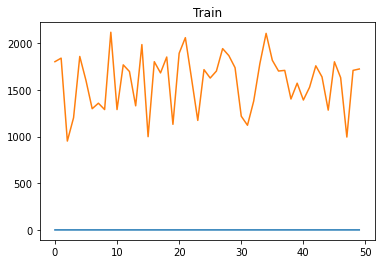

2/2 [==============================] - 2s 6ms/step


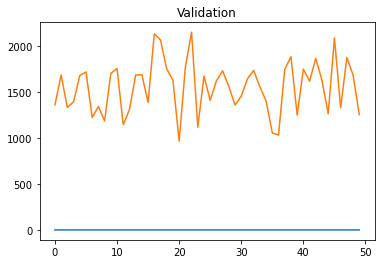

3/3 [==============================] - 0s 6ms/step


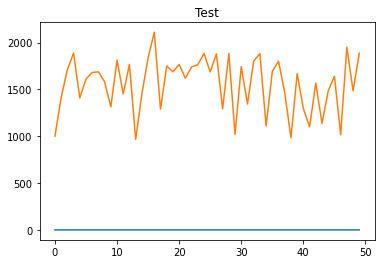

3/3 [==============================] - 0s 5ms/step


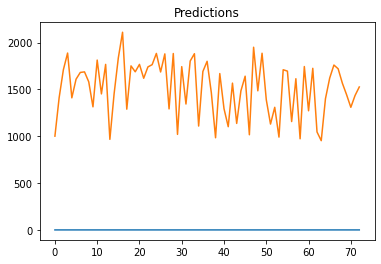

In [25]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [26]:
mavg_auto_gru_mse

2374969.4168706173

### LSTM

Epoch 1/10
5/8 [=================>............] - ETA: 0s - loss: 2469188.5000 - root_mean_squared_error: 1571.3651  

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 2s/step - loss: 2533858.7500 - root_mean_squared_error: 1591.8099 - val_loss: 2505443.7500 - val_root_mean_squared_error: 1582.8595
Epoch 2/10
6/8 [=====================>........] - ETA: 0s - loss: 2509608.2500 - root_mean_squared_error: 1584.1743

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2533667.0000 - root_mean_squared_error: 1591.7496 - val_loss: 2505315.2500 - val_root_mean_squared_error: 1582.8187
Epoch 3/10
6/8 [=====================>........] - ETA: 0s - loss: 2504358.7500 - root_mean_squared_error: 1582.5166

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2533339.5000 - root_mean_squared_error: 1591.6467 - val_loss: 2505197.2500 - val_root_mean_squared_error: 1582.7815
Epoch 4/10
4/8 [==============>...............] - ETA: 0s - loss: 2508540.0000 - root_mean_squared_error: 1583.8372

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2533572.0000 - root_mean_squared_error: 1591.7198 - val_loss: 2505137.7500 - val_root_mean_squared_error: 1582.7627
Epoch 5/10
5/8 [=================>............] - ETA: 0s - loss: 2509407.5000 - root_mean_squared_error: 1584.1110

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2533409.7500 - root_mean_squared_error: 1591.6688 - val_loss: 2505087.0000 - val_root_mean_squared_error: 1582.7467
Epoch 6/10
6/8 [=====================>........] - ETA: 0s - loss: 2518649.2500 - root_mean_squared_error: 1587.0253

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2533251.7500 - root_mean_squared_error: 1591.6193 - val_loss: 2505038.2500 - val_root_mean_squared_error: 1582.7313
Epoch 7/10
6/8 [=====================>........] - ETA: 0s - loss: 2542590.0000 - root_mean_squared_error: 1594.5500

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2533275.0000 - root_mean_squared_error: 1591.6266 - val_loss: 2504989.7500 - val_root_mean_squared_error: 1582.7159
Epoch 8/10
8/8 [==============================] - ETA: 0s - loss: 2533260.7500 - root_mean_squared_error: 1591.6221

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2533260.7500 - root_mean_squared_error: 1591.6221 - val_loss: 2504941.7500 - val_root_mean_squared_error: 1582.7008
Epoch 9/10
5/8 [=================>............] - ETA: 0s - loss: 2535640.2500 - root_mean_squared_error: 1592.3694

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2533115.2500 - root_mean_squared_error: 1591.5763 - val_loss: 2504893.7500 - val_root_mean_squared_error: 1582.6855
Epoch 10/10
7/8 [=========================>....] - ETA: 0s - loss: 2536665.5000 - root_mean_squared_error: 1592.6913

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 2s 4ms/step


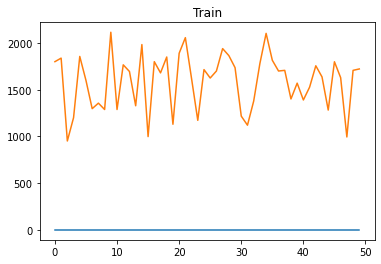

2/2 [==============================] - 2s 12ms/step


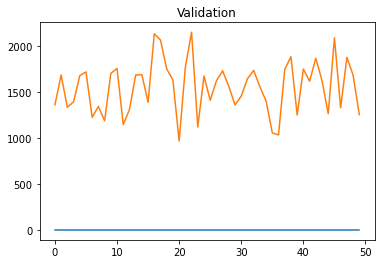

3/3 [==============================] - 0s 4ms/step


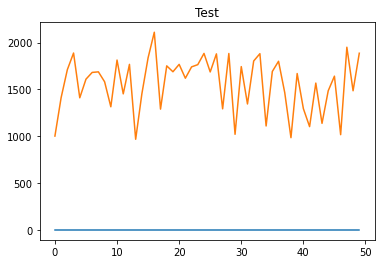

3/3 [==============================] - 0s 9ms/step


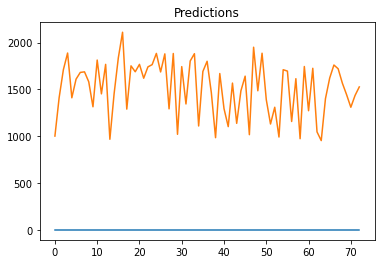

In [27]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [28]:
mavg_auto_lstm_mse

2379811.2758457344

# Hybrid

## General

### CNN LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2531384.0000 - root_mean_squared_error: 1591.0323

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 52s 5s/step - loss: 2530812.5000 - root_mean_squared_error: 1590.8528 - val_loss: 2504249.5000 - val_root_mean_squared_error: 1582.4821
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2530118.2500 - root_mean_squared_error: 1590.6345

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2530118.2500 - root_mean_squared_error: 1590.6345 - val_loss: 2503597.7500 - val_root_mean_squared_error: 1582.2761
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2529576.2500 - root_mean_squared_error: 1590.4641

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2529576.2500 - root_mean_squared_error: 1590.4641 - val_loss: 2503140.7500 - val_root_mean_squared_error: 1582.1316
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2529048.7500 - root_mean_squared_error: 1590.2983

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2529048.7500 - root_mean_squared_error: 1590.2983 - val_loss: 2502529.7500 - val_root_mean_squared_error: 1581.9386
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2528525.5000 - root_mean_squared_error: 1590.1338

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2528525.5000 - root_mean_squared_error: 1590.1338 - val_loss: 2502111.5000 - val_root_mean_squared_error: 1581.8064
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2528088.0000 - root_mean_squared_error: 1589.9962

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2528088.0000 - root_mean_squared_error: 1589.9962 - val_loss: 2501616.2500 - val_root_mean_squared_error: 1581.6499
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2527591.5000 - root_mean_squared_error: 1589.8401

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2527591.5000 - root_mean_squared_error: 1589.8401 - val_loss: 2501183.0000 - val_root_mean_squared_error: 1581.5129
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2509838.7500 - root_mean_squared_error: 1584.2471

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2527158.5000 - root_mean_squared_error: 1589.7039 - val_loss: 2500711.7500 - val_root_mean_squared_error: 1581.3639
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2528298.5000 - root_mean_squared_error: 1590.0624

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2526696.7500 - root_mean_squared_error: 1589.5587 - val_loss: 2500275.5000 - val_root_mean_squared_error: 1581.2260
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2526183.0000 - root_mean_squared_error: 1589.3971

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2526183.0000 - root_mean_squared_error: 1589.3971 - val_loss: 2499413.5000 - val_root_mean_squared_error: 1580.9534
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2525371.5000 - root_mean_squared_error: 1589.1417

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2525371.5000 - root_mean_squared_error: 1589.1417 - val_loss: 2498903.2500 - val_root_mean_squared_error: 1580.7920
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2524864.0000 - root_mean_squared_error: 1588.9821

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2524864.0000 - root_mean_squared_error: 1588.9821 - val_loss: 2498397.7500 - val_root_mean_squared_error: 1580.6321
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2513220.5000 - root_mean_squared_error: 1585.3140

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2524354.7500 - root_mean_squared_error: 1588.8218 - val_loss: 2497880.7500 - val_root_mean_squared_error: 1580.4685
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2521616.0000 - root_mean_squared_error: 1587.9597

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2523832.0000 - root_mean_squared_error: 1588.6573 - val_loss: 2497353.7500 - val_root_mean_squared_error: 1580.3018
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2523095.7500 - root_mean_squared_error: 1588.4255

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2523300.7500 - root_mean_squared_error: 1588.4901 - val_loss: 2496821.5000 - val_root_mean_squared_error: 1580.1334
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2522752.2500 - root_mean_squared_error: 1588.3174

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2522752.2500 - root_mean_squared_error: 1588.3174 - val_loss: 2496228.5000 - val_root_mean_squared_error: 1579.9457
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2542822.7500 - root_mean_squared_error: 1594.6230

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2522183.2500 - root_mean_squared_error: 1588.1383 - val_loss: 2495712.5000 - val_root_mean_squared_error: 1579.7825
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2515732.2500 - root_mean_squared_error: 1586.1060

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 4s/step - loss: 2521658.7500 - root_mean_squared_error: 1587.9731 - val_loss: 2495139.5000 - val_root_mean_squared_error: 1579.6011
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2521046.0000 - root_mean_squared_error: 1587.7802

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2521046.0000 - root_mean_squared_error: 1587.7802 - val_loss: 2494563.5000 - val_root_mean_squared_error: 1579.4187
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2516687.7500 - root_mean_squared_error: 1586.4072

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2520519.0000 - root_mean_squared_error: 1587.6143 - val_loss: 2494053.5000 - val_root_mean_squared_error: 1579.2572
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2520014.7500 - root_mean_squared_error: 1587.4554

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2520014.7500 - root_mean_squared_error: 1587.4554 - val_loss: 2493565.2500 - val_root_mean_squared_error: 1579.1028
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2531835.5000 - root_mean_squared_error: 1591.1742

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2519535.5000 - root_mean_squared_error: 1587.3044 - val_loss: 2493094.0000 - val_root_mean_squared_error: 1578.9535
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2521551.2500 - root_mean_squared_error: 1587.9393

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2519070.0000 - root_mean_squared_error: 1587.1578 - val_loss: 2492643.2500 - val_root_mean_squared_error: 1578.8107
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2518625.2500 - root_mean_squared_error: 1587.0177

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2518625.2500 - root_mean_squared_error: 1587.0177 - val_loss: 2492208.5000 - val_root_mean_squared_error: 1578.6730
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2518197.7500 - root_mean_squared_error: 1586.8831

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2518197.7500 - root_mean_squared_error: 1586.8831 - val_loss: 2491789.7500 - val_root_mean_squared_error: 1578.5404
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2522301.7500 - root_mean_squared_error: 1588.1757

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2517783.2500 - root_mean_squared_error: 1586.7524 - val_loss: 2491387.5000 - val_root_mean_squared_error: 1578.4130
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2527112.5000 - root_mean_squared_error: 1589.6895

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2517390.5000 - root_mean_squared_error: 1586.6287 - val_loss: 2491004.2500 - val_root_mean_squared_error: 1578.2915
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2512910.2500 - root_mean_squared_error: 1585.2162

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2517015.7500 - root_mean_squared_error: 1586.5105 - val_loss: 2490641.5000 - val_root_mean_squared_error: 1578.1766
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2508788.2500 - root_mean_squared_error: 1583.9155

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2516659.7500 - root_mean_squared_error: 1586.3983 - val_loss: 2490298.0000 - val_root_mean_squared_error: 1578.0679
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2504904.0000 - root_mean_squared_error: 1582.6888

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2516322.7500 - root_mean_squared_error: 1586.2921 - val_loss: 2489975.2500 - val_root_mean_squared_error: 1577.9656
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2516008.7500 - root_mean_squared_error: 1586.1931

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2516008.7500 - root_mean_squared_error: 1586.1931 - val_loss: 2489671.5000 - val_root_mean_squared_error: 1577.8693
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2519053.5000 - root_mean_squared_error: 1587.1526

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 2515714.2500 - root_mean_squared_error: 1586.1003 - val_loss: 2489386.5000 - val_root_mean_squared_error: 1577.7789
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2515435.5000 - root_mean_squared_error: 1586.0125

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2515435.5000 - root_mean_squared_error: 1586.0125 - val_loss: 2489119.0000 - val_root_mean_squared_error: 1577.6942
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2515172.2500 - root_mean_squared_error: 1585.9294

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2515172.2500 - root_mean_squared_error: 1585.9294 - val_loss: 2488864.0000 - val_root_mean_squared_error: 1577.6134
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2500940.5000 - root_mean_squared_error: 1581.4362

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2514921.2500 - root_mean_squared_error: 1585.8503 - val_loss: 2488620.7500 - val_root_mean_squared_error: 1577.5363
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2523276.7500 - root_mean_squared_error: 1588.4825

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2514680.7500 - root_mean_squared_error: 1585.7745 - val_loss: 2488386.7500 - val_root_mean_squared_error: 1577.4622
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2514451.0000 - root_mean_squared_error: 1585.7020

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2514451.0000 - root_mean_squared_error: 1585.7020 - val_loss: 2488161.7500 - val_root_mean_squared_error: 1577.3907
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2525494.7500 - root_mean_squared_error: 1589.1805

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 39s 5s/step - loss: 2514228.0000 - root_mean_squared_error: 1585.6317 - val_loss: 2487942.0000 - val_root_mean_squared_error: 1577.3212
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2514013.2500 - root_mean_squared_error: 1585.5640

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2514013.2500 - root_mean_squared_error: 1585.5640 - val_loss: 2487728.2500 - val_root_mean_squared_error: 1577.2534
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2513800.7500 - root_mean_squared_error: 1585.4969

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2513800.7500 - root_mean_squared_error: 1585.4969 - val_loss: 2487521.0000 - val_root_mean_squared_error: 1577.1877
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2533117.7500 - root_mean_squared_error: 1591.5771

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2513595.0000 - root_mean_squared_error: 1585.4321 - val_loss: 2487318.2500 - val_root_mean_squared_error: 1577.1234
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2518860.7500 - root_mean_squared_error: 1587.0919

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2513394.2500 - root_mean_squared_error: 1585.3688 - val_loss: 2487122.0000 - val_root_mean_squared_error: 1577.0612
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2517920.2500 - root_mean_squared_error: 1586.7955

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2513199.7500 - root_mean_squared_error: 1585.3075 - val_loss: 2486930.2500 - val_root_mean_squared_error: 1577.0004
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2520137.5000 - root_mean_squared_error: 1587.4941

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 4s/step - loss: 2513011.0000 - root_mean_squared_error: 1585.2479 - val_loss: 2486742.5000 - val_root_mean_squared_error: 1576.9409
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2511326.0000 - root_mean_squared_error: 1584.7164

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2512824.0000 - root_mean_squared_error: 1585.1890 - val_loss: 2486560.2500 - val_root_mean_squared_error: 1576.8831
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2512643.0000 - root_mean_squared_error: 1585.1318

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2512643.0000 - root_mean_squared_error: 1585.1318 - val_loss: 2486382.0000 - val_root_mean_squared_error: 1576.8265
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2502836.7500 - root_mean_squared_error: 1582.0356

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2512467.0000 - root_mean_squared_error: 1585.0763 - val_loss: 2486207.2500 - val_root_mean_squared_error: 1576.7712
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2513116.7500 - root_mean_squared_error: 1585.2812

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2512293.2500 - root_mean_squared_error: 1585.0215 - val_loss: 2486035.7500 - val_root_mean_squared_error: 1576.7168
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2512123.0000 - root_mean_squared_error: 1584.9678

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2512123.0000 - root_mean_squared_error: 1584.9678 - val_loss: 2485869.2500 - val_root_mean_squared_error: 1576.6639
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2510017.2500 - root_mean_squared_error: 1584.3033

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 3s 20ms/step


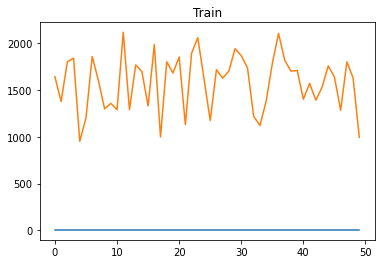

2/2 [==============================] - 8s 22ms/step


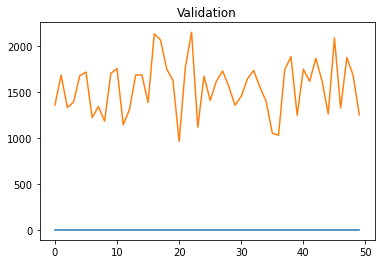

3/3 [==============================] - 0s 122ms/step


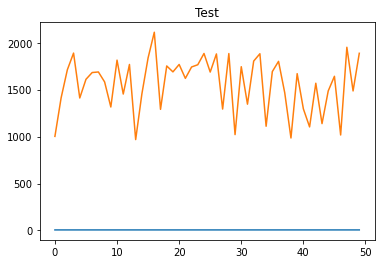

3/3 [==============================] - 0s 8ms/step


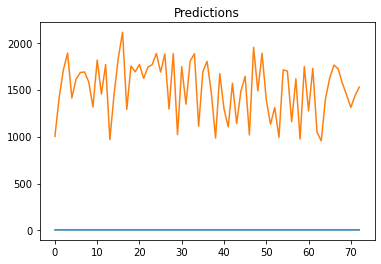

In [29]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [30]:
hybrid_cnn_lstm_mse

2361211.1149110813

### RNN LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2523970.0000 - root_mean_squared_error: 1588.7007 

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 35s 4s/step - loss: 2531622.7500 - root_mean_squared_error: 1591.1074 - val_loss: 2505107.2500 - val_root_mean_squared_error: 1582.7531
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2531036.0000 - root_mean_squared_error: 1590.9230

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2531036.0000 - root_mean_squared_error: 1590.9230 - val_loss: 2504521.7500 - val_root_mean_squared_error: 1582.5680
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2530449.0000 - root_mean_squared_error: 1590.7385

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2530449.0000 - root_mean_squared_error: 1590.7385 - val_loss: 2503932.2500 - val_root_mean_squared_error: 1582.3818
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2529858.2500 - root_mean_squared_error: 1590.5529

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2529858.2500 - root_mean_squared_error: 1590.5529 - val_loss: 2503342.5000 - val_root_mean_squared_error: 1582.1954
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 2561396.7500 - root_mean_squared_error: 1600.4364

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2529269.2500 - root_mean_squared_error: 1590.3677 - val_loss: 2502748.5000 - val_root_mean_squared_error: 1582.0077
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2570851.2500 - root_mean_squared_error: 1603.3875

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2528673.2500 - root_mean_squared_error: 1590.1803 - val_loss: 2502152.7500 - val_root_mean_squared_error: 1581.8196
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 2576053.5000 - root_mean_squared_error: 1605.0089

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2528077.5000 - root_mean_squared_error: 1589.9929 - val_loss: 2501551.5000 - val_root_mean_squared_error: 1581.6294
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2532602.7500 - root_mean_squared_error: 1591.4153

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2527470.0000 - root_mean_squared_error: 1589.8019 - val_loss: 2500929.0000 - val_root_mean_squared_error: 1581.4326
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 2513505.5000 - root_mean_squared_error: 1585.4039

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2526834.7500 - root_mean_squared_error: 1589.6021 - val_loss: 2500316.5000 - val_root_mean_squared_error: 1581.2389
Epoch 10/50
4/8 [==============>...............] - ETA: 0s - loss: 2448228.2500 - root_mean_squared_error: 1564.6815

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2526234.5000 - root_mean_squared_error: 1589.4132 - val_loss: 2499711.7500 - val_root_mean_squared_error: 1581.0477
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 2546639.5000 - root_mean_squared_error: 1595.8193

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2525635.5000 - root_mean_squared_error: 1589.2249 - val_loss: 2499113.5000 - val_root_mean_squared_error: 1580.8585
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2525032.5000 - root_mean_squared_error: 1589.0350

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2525032.5000 - root_mean_squared_error: 1589.0350 - val_loss: 2498513.5000 - val_root_mean_squared_error: 1580.6687
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2530394.0000 - root_mean_squared_error: 1590.7212

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2524435.5000 - root_mean_squared_error: 1588.8472 - val_loss: 2497914.5000 - val_root_mean_squared_error: 1580.4792
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2523837.5000 - root_mean_squared_error: 1588.6591

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2523837.5000 - root_mean_squared_error: 1588.6591 - val_loss: 2497321.7500 - val_root_mean_squared_error: 1580.2916
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 2496516.7500 - root_mean_squared_error: 1580.0370

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2523245.7500 - root_mean_squared_error: 1588.4728 - val_loss: 2496734.2500 - val_root_mean_squared_error: 1580.1057
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2537149.7500 - root_mean_squared_error: 1592.8433

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2522662.5000 - root_mean_squared_error: 1588.2892 - val_loss: 2496149.7500 - val_root_mean_squared_error: 1579.9208
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2522079.7500 - root_mean_squared_error: 1588.1057

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2522079.7500 - root_mean_squared_error: 1588.1057 - val_loss: 2495575.5000 - val_root_mean_squared_error: 1579.7390
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 2574866.0000 - root_mean_squared_error: 1604.6389

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2521508.0000 - root_mean_squared_error: 1587.9257 - val_loss: 2495005.0000 - val_root_mean_squared_error: 1579.5585
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2520936.2500 - root_mean_squared_error: 1587.7456

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2520936.2500 - root_mean_squared_error: 1587.7456 - val_loss: 2494442.2500 - val_root_mean_squared_error: 1579.3802
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2527797.2500 - root_mean_squared_error: 1589.9048

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2520376.7500 - root_mean_squared_error: 1587.5695 - val_loss: 2493880.5000 - val_root_mean_squared_error: 1579.2025
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2534767.7500 - root_mean_squared_error: 1592.0953

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2519820.7500 - root_mean_squared_error: 1587.3943 - val_loss: 2493331.7500 - val_root_mean_squared_error: 1579.0287
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2519278.2500 - root_mean_squared_error: 1587.2234

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2519278.2500 - root_mean_squared_error: 1587.2234 - val_loss: 2492796.5000 - val_root_mean_squared_error: 1578.8593
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 2493056.5000 - root_mean_squared_error: 1578.9415

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2518745.7500 - root_mean_squared_error: 1587.0557 - val_loss: 2492276.5000 - val_root_mean_squared_error: 1578.6946
Epoch 24/50
5/8 [=================>............] - ETA: 0s - loss: 2478126.0000 - root_mean_squared_error: 1574.2064

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2518231.0000 - root_mean_squared_error: 1586.8936 - val_loss: 2491772.7500 - val_root_mean_squared_error: 1578.5350
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2533298.7500 - root_mean_squared_error: 1591.6340

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2517735.2500 - root_mean_squared_error: 1586.7373 - val_loss: 2491285.0000 - val_root_mean_squared_error: 1578.3805
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2502425.5000 - root_mean_squared_error: 1581.9056

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2517255.5000 - root_mean_squared_error: 1586.5861 - val_loss: 2490819.0000 - val_root_mean_squared_error: 1578.2329
Epoch 27/50
5/8 [=================>............] - ETA: 0s - loss: 2537792.5000 - root_mean_squared_error: 1593.0450

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2516794.7500 - root_mean_squared_error: 1586.4409 - val_loss: 2490370.0000 - val_root_mean_squared_error: 1578.0906
Epoch 28/50
5/8 [=================>............] - ETA: 0s - loss: 2534127.5000 - root_mean_squared_error: 1591.8943

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2516354.5000 - root_mean_squared_error: 1586.3021 - val_loss: 2489939.7500 - val_root_mean_squared_error: 1577.9543
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 2527853.0000 - root_mean_squared_error: 1589.9224

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2515932.2500 - root_mean_squared_error: 1586.1691 - val_loss: 2489530.7500 - val_root_mean_squared_error: 1577.8247
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 2482011.2500 - root_mean_squared_error: 1575.4401

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2515531.0000 - root_mean_squared_error: 1586.0426 - val_loss: 2489145.5000 - val_root_mean_squared_error: 1577.7026
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2512402.2500 - root_mean_squared_error: 1585.0559

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2515154.0000 - root_mean_squared_error: 1585.9237 - val_loss: 2488778.0000 - val_root_mean_squared_error: 1577.5862
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 2451809.2500 - root_mean_squared_error: 1565.8254

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2514793.5000 - root_mean_squared_error: 1585.8101 - val_loss: 2488432.2500 - val_root_mean_squared_error: 1577.4766
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 2492981.5000 - root_mean_squared_error: 1578.9178

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2514456.0000 - root_mean_squared_error: 1585.7036 - val_loss: 2488106.2500 - val_root_mean_squared_error: 1577.3733
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2514138.7500 - root_mean_squared_error: 1585.6036

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 2s/step - loss: 2514138.7500 - root_mean_squared_error: 1585.6036 - val_loss: 2487798.0000 - val_root_mean_squared_error: 1577.2755
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2464046.2500 - root_mean_squared_error: 1569.7280

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2513836.2500 - root_mean_squared_error: 1585.5082 - val_loss: 2487509.5000 - val_root_mean_squared_error: 1577.1841
Epoch 36/50
5/8 [=================>............] - ETA: 0s - loss: 2482985.0000 - root_mean_squared_error: 1575.7490

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2513553.0000 - root_mean_squared_error: 1585.4188 - val_loss: 2487234.2500 - val_root_mean_squared_error: 1577.0968
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2521574.5000 - root_mean_squared_error: 1587.9467

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2513283.5000 - root_mean_squared_error: 1585.3339 - val_loss: 2486973.0000 - val_root_mean_squared_error: 1577.0139
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 2493911.2500 - root_mean_squared_error: 1579.2123

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2513027.0000 - root_mean_squared_error: 1585.2529 - val_loss: 2486722.2500 - val_root_mean_squared_error: 1576.9343
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 2525364.7500 - root_mean_squared_error: 1589.1396

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2512780.5000 - root_mean_squared_error: 1585.1752 - val_loss: 2486479.7500 - val_root_mean_squared_error: 1576.8574
Epoch 40/50
4/8 [==============>...............] - ETA: 0s - loss: 2493980.0000 - root_mean_squared_error: 1579.2340

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2512540.0000 - root_mean_squared_error: 1585.0994 - val_loss: 2486246.2500 - val_root_mean_squared_error: 1576.7836
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2525081.2500 - root_mean_squared_error: 1589.0504

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2512309.7500 - root_mean_squared_error: 1585.0267 - val_loss: 2486019.5000 - val_root_mean_squared_error: 1576.7117
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2512086.0000 - root_mean_squared_error: 1584.9562

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2512086.0000 - root_mean_squared_error: 1584.9562 - val_loss: 2485798.5000 - val_root_mean_squared_error: 1576.6415
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 2560369.2500 - root_mean_squared_error: 1600.1154

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2511867.7500 - root_mean_squared_error: 1584.8873 - val_loss: 2485583.0000 - val_root_mean_squared_error: 1576.5732
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2498522.7500 - root_mean_squared_error: 1580.6716

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2511653.5000 - root_mean_squared_error: 1584.8197 - val_loss: 2485373.0000 - val_root_mean_squared_error: 1576.5065
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2514721.7500 - root_mean_squared_error: 1585.7875

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2511444.2500 - root_mean_squared_error: 1584.7537 - val_loss: 2485169.0000 - val_root_mean_squared_error: 1576.4419
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 2469871.7500 - root_mean_squared_error: 1571.5825

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2511243.2500 - root_mean_squared_error: 1584.6903 - val_loss: 2484971.2500 - val_root_mean_squared_error: 1576.3792
Epoch 47/50
4/8 [==============>...............] - ETA: 0s - loss: 2446655.0000 - root_mean_squared_error: 1564.1787

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2511048.2500 - root_mean_squared_error: 1584.6288 - val_loss: 2484779.7500 - val_root_mean_squared_error: 1576.3184
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 2556466.2500 - root_mean_squared_error: 1598.8953

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2510859.7500 - root_mean_squared_error: 1584.5692 - val_loss: 2484593.5000 - val_root_mean_squared_error: 1576.2593
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 2509585.5000 - root_mean_squared_error: 1584.1671

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2510675.7500 - root_mean_squared_error: 1584.5112 - val_loss: 2484413.2500 - val_root_mean_squared_error: 1576.2021
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2510497.5000 - root_mean_squared_error: 1584.4550

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 5s 8ms/step


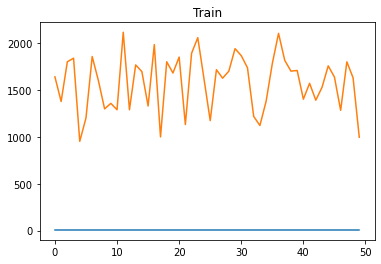

2/2 [==============================] - 3s 11ms/step


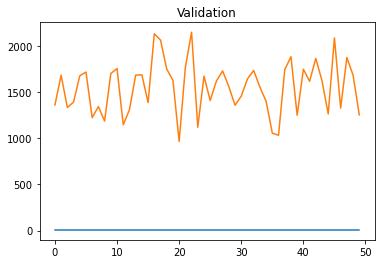

3/3 [==============================] - 1s 375ms/step


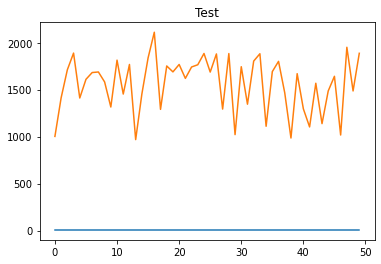

3/3 [==============================] - 0s 7ms/step


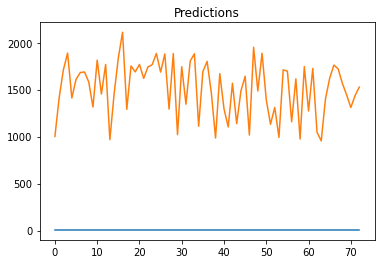

In [31]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [32]:
hybrid_rnn_lstm_mse

2359786.204617789

### RNN GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2533407.2500 - root_mean_squared_error: 1591.6681  

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 43s 4s/step - loss: 2531249.2500 - root_mean_squared_error: 1590.9900 - val_loss: 2504448.7500 - val_root_mean_squared_error: 1582.5450
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2530193.0000 - root_mean_squared_error: 1590.6581

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2530193.0000 - root_mean_squared_error: 1590.6581 - val_loss: 2503393.7500 - val_root_mean_squared_error: 1582.2117
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 2537379.2500 - root_mean_squared_error: 1592.9153

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2529146.5000 - root_mean_squared_error: 1590.3291 - val_loss: 2502359.0000 - val_root_mean_squared_error: 1581.8846
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2503313.2500 - root_mean_squared_error: 1582.1863

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2528114.2500 - root_mean_squared_error: 1590.0045 - val_loss: 2501341.7500 - val_root_mean_squared_error: 1581.5631
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2527104.5000 - root_mean_squared_error: 1589.6869

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2527104.5000 - root_mean_squared_error: 1589.6869 - val_loss: 2500341.7500 - val_root_mean_squared_error: 1581.2469
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2526111.0000 - root_mean_squared_error: 1589.3744

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2526111.0000 - root_mean_squared_error: 1589.3744 - val_loss: 2499356.7500 - val_root_mean_squared_error: 1580.9354
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2544041.2500 - root_mean_squared_error: 1595.0051

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2525132.2500 - root_mean_squared_error: 1589.0665 - val_loss: 2498381.0000 - val_root_mean_squared_error: 1580.6268
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2513486.7500 - root_mean_squared_error: 1585.3979

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2524162.0000 - root_mean_squared_error: 1588.7611 - val_loss: 2497420.5000 - val_root_mean_squared_error: 1580.3229
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2523200.5000 - root_mean_squared_error: 1588.4585

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2523200.5000 - root_mean_squared_error: 1588.4585 - val_loss: 2496461.7500 - val_root_mean_squared_error: 1580.0195
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2522244.5000 - root_mean_squared_error: 1588.1576

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2522244.5000 - root_mean_squared_error: 1588.1576 - val_loss: 2495511.2500 - val_root_mean_squared_error: 1579.7188
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2521294.5000 - root_mean_squared_error: 1587.8585

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2521294.5000 - root_mean_squared_error: 1587.8585 - val_loss: 2494567.7500 - val_root_mean_squared_error: 1579.4200
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2520355.5000 - root_mean_squared_error: 1587.5627

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2520355.5000 - root_mean_squared_error: 1587.5627 - val_loss: 2493627.5000 - val_root_mean_squared_error: 1579.1224
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2519419.5000 - root_mean_squared_error: 1587.2679

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2519419.5000 - root_mean_squared_error: 1587.2679 - val_loss: 2492699.7500 - val_root_mean_squared_error: 1578.8286
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2518499.2500 - root_mean_squared_error: 1586.9780

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2518499.2500 - root_mean_squared_error: 1586.9780 - val_loss: 2491781.0000 - val_root_mean_squared_error: 1578.5376
Epoch 15/50
4/8 [==============>...............] - ETA: 0s - loss: 2618459.5000 - root_mean_squared_error: 1618.1655

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2517581.5000 - root_mean_squared_error: 1586.6888 - val_loss: 2490869.2500 - val_root_mean_squared_error: 1578.2489
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2516672.7500 - root_mean_squared_error: 1586.4025

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2516672.7500 - root_mean_squared_error: 1586.4025 - val_loss: 2489963.7500 - val_root_mean_squared_error: 1577.9619
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2515768.0000 - root_mean_squared_error: 1586.1173

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2515768.0000 - root_mean_squared_error: 1586.1173 - val_loss: 2489070.2500 - val_root_mean_squared_error: 1577.6788
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 2534880.0000 - root_mean_squared_error: 1592.1306

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2514879.5000 - root_mean_squared_error: 1585.8372 - val_loss: 2488189.7500 - val_root_mean_squared_error: 1577.3997
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 2565245.2500 - root_mean_squared_error: 1601.6383

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2514006.0000 - root_mean_squared_error: 1585.5618 - val_loss: 2487331.7500 - val_root_mean_squared_error: 1577.1277
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2495712.0000 - root_mean_squared_error: 1579.7822

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2513153.0000 - root_mean_squared_error: 1585.2927 - val_loss: 2486497.7500 - val_root_mean_squared_error: 1576.8633
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2512135.2500 - root_mean_squared_error: 1584.9717

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2512332.7500 - root_mean_squared_error: 1585.0339 - val_loss: 2485683.7500 - val_root_mean_squared_error: 1576.6051
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 2497650.0000 - root_mean_squared_error: 1580.3955

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2511528.0000 - root_mean_squared_error: 1584.7802 - val_loss: 2484907.0000 - val_root_mean_squared_error: 1576.3588
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 2541461.5000 - root_mean_squared_error: 1594.1962

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2510768.0000 - root_mean_squared_error: 1584.5403 - val_loss: 2484161.7500 - val_root_mean_squared_error: 1576.1224
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2510034.7500 - root_mean_squared_error: 1584.3090

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2510034.7500 - root_mean_squared_error: 1584.3090 - val_loss: 2483456.2500 - val_root_mean_squared_error: 1575.8987
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 2585633.7500 - root_mean_squared_error: 1607.9906

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2509345.7500 - root_mean_squared_error: 1584.0914 - val_loss: 2482786.5000 - val_root_mean_squared_error: 1575.6860
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2508689.0000 - root_mean_squared_error: 1583.8842

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2508689.0000 - root_mean_squared_error: 1583.8842 - val_loss: 2482156.5000 - val_root_mean_squared_error: 1575.4861
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2521214.5000 - root_mean_squared_error: 1587.8333

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2508074.0000 - root_mean_squared_error: 1583.6899 - val_loss: 2481560.2500 - val_root_mean_squared_error: 1575.2969
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2535918.2500 - root_mean_squared_error: 1592.4567

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2507492.2500 - root_mean_squared_error: 1583.5063 - val_loss: 2481001.7500 - val_root_mean_squared_error: 1575.1196
Epoch 29/50
5/8 [=================>............] - ETA: 0s - loss: 2511872.5000 - root_mean_squared_error: 1584.8888

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2506947.5000 - root_mean_squared_error: 1583.3344 - val_loss: 2480480.5000 - val_root_mean_squared_error: 1574.9541
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2515256.2500 - root_mean_squared_error: 1585.9559

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2506441.2500 - root_mean_squared_error: 1583.1744 - val_loss: 2479992.0000 - val_root_mean_squared_error: 1574.7991
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2512214.7500 - root_mean_squared_error: 1584.9968

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2505964.2500 - root_mean_squared_error: 1583.0238 - val_loss: 2479535.5000 - val_root_mean_squared_error: 1574.6541
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2505520.0000 - root_mean_squared_error: 1582.8834

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2505520.0000 - root_mean_squared_error: 1582.8834 - val_loss: 2479108.5000 - val_root_mean_squared_error: 1574.5186
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2505102.7500 - root_mean_squared_error: 1582.7516

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2505102.7500 - root_mean_squared_error: 1582.7516 - val_loss: 2478713.5000 - val_root_mean_squared_error: 1574.3931
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2504719.0000 - root_mean_squared_error: 1582.6304

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2504719.0000 - root_mean_squared_error: 1582.6304 - val_loss: 2478343.0000 - val_root_mean_squared_error: 1574.2754
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2504358.2500 - root_mean_squared_error: 1582.5165

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2504358.2500 - root_mean_squared_error: 1582.5165 - val_loss: 2477999.5000 - val_root_mean_squared_error: 1574.1663
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2482128.5000 - root_mean_squared_error: 1575.4772

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2504023.7500 - root_mean_squared_error: 1582.4108 - val_loss: 2477680.0000 - val_root_mean_squared_error: 1574.0648
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 2575627.5000 - root_mean_squared_error: 1604.8762

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2503714.2500 - root_mean_squared_error: 1582.3130 - val_loss: 2477378.7500 - val_root_mean_squared_error: 1573.9691
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2503419.5000 - root_mean_squared_error: 1582.2198

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2503419.5000 - root_mean_squared_error: 1582.2198 - val_loss: 2477100.5000 - val_root_mean_squared_error: 1573.8807
Epoch 39/50
5/8 [=================>............] - ETA: 0s - loss: 2460861.5000 - root_mean_squared_error: 1568.7134

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2503148.5000 - root_mean_squared_error: 1582.1342 - val_loss: 2476839.7500 - val_root_mean_squared_error: 1573.7979
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 2469235.5000 - root_mean_squared_error: 1571.3801

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2502893.0000 - root_mean_squared_error: 1582.0535 - val_loss: 2476594.0000 - val_root_mean_squared_error: 1573.7198
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2502653.7500 - root_mean_squared_error: 1581.9778

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2502653.7500 - root_mean_squared_error: 1581.9778 - val_loss: 2476361.5000 - val_root_mean_squared_error: 1573.6459
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 2463807.7500 - root_mean_squared_error: 1569.6521

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2502426.0000 - root_mean_squared_error: 1581.9058 - val_loss: 2476141.7500 - val_root_mean_squared_error: 1573.5760
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 2475643.5000 - root_mean_squared_error: 1573.4177

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2502210.0000 - root_mean_squared_error: 1581.8375 - val_loss: 2475932.7500 - val_root_mean_squared_error: 1573.5096
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 2542301.7500 - root_mean_squared_error: 1594.4597

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2502005.7500 - root_mean_squared_error: 1581.7729 - val_loss: 2475732.5000 - val_root_mean_squared_error: 1573.4460
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2501808.5000 - root_mean_squared_error: 1581.7106

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2501808.5000 - root_mean_squared_error: 1581.7106 - val_loss: 2475541.5000 - val_root_mean_squared_error: 1573.3854
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 2487935.2500 - root_mean_squared_error: 1577.3190

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2501620.7500 - root_mean_squared_error: 1581.6512 - val_loss: 2475357.0000 - val_root_mean_squared_error: 1573.3268
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 2478257.2500 - root_mean_squared_error: 1574.2482

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2501437.2500 - root_mean_squared_error: 1581.5933 - val_loss: 2475177.5000 - val_root_mean_squared_error: 1573.2697
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 2518068.0000 - root_mean_squared_error: 1586.8422

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2501260.2500 - root_mean_squared_error: 1581.5374 - val_loss: 2475002.0000 - val_root_mean_squared_error: 1573.2139
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2501086.0000 - root_mean_squared_error: 1581.4822

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2501086.0000 - root_mean_squared_error: 1581.4822 - val_loss: 2474831.0000 - val_root_mean_squared_error: 1573.1595
Epoch 50/50
4/8 [==============>...............] - ETA: 0s - loss: 2527781.0000 - root_mean_squared_error: 1589.8997

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 11ms/step


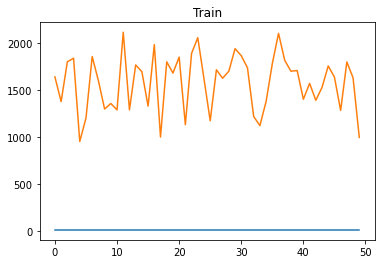

2/2 [==============================] - 4s 16ms/step


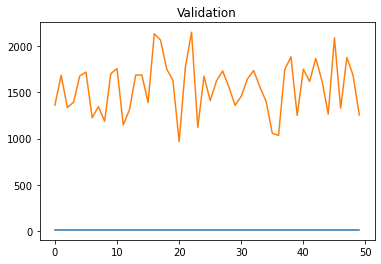

3/3 [==============================] - 0s 34ms/step


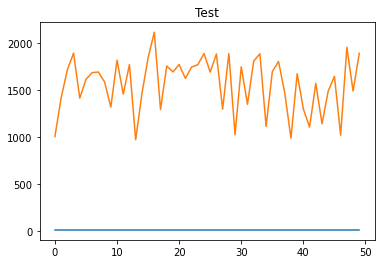

3/3 [==============================] - 0s 6ms/step


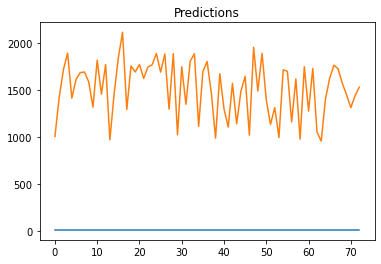

In [33]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [34]:
hybrid_rnn_gru_mse

2350478.337587173

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2531930.0000 - root_mean_squared_error: 1591.2040

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 61s 5s/step - loss: 2531930.0000 - root_mean_squared_error: 1591.2040 - val_loss: 2505215.0000 - val_root_mean_squared_error: 1582.7871
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2531522.0000 - root_mean_squared_error: 1591.0757

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2530999.5000 - root_mean_squared_error: 1590.9115 - val_loss: 2504076.5000 - val_root_mean_squared_error: 1582.4274
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2529910.2500 - root_mean_squared_error: 1590.5692

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2529910.2500 - root_mean_squared_error: 1590.5692 - val_loss: 2503290.2500 - val_root_mean_squared_error: 1582.1790
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2517125.7500 - root_mean_squared_error: 1586.5452

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2529028.7500 - root_mean_squared_error: 1590.2920 - val_loss: 2501870.2500 - val_root_mean_squared_error: 1581.7301
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2527728.2500 - root_mean_squared_error: 1589.8831

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 61s 9s/step - loss: 2527728.2500 - root_mean_squared_error: 1589.8831 - val_loss: 2501056.0000 - val_root_mean_squared_error: 1581.4728
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2526941.0000 - root_mean_squared_error: 1589.6355

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2526941.0000 - root_mean_squared_error: 1589.6355 - val_loss: 2500402.7500 - val_root_mean_squared_error: 1581.2662
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2526250.0000 - root_mean_squared_error: 1589.4181

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2526250.0000 - root_mean_squared_error: 1589.4181 - val_loss: 2499719.2500 - val_root_mean_squared_error: 1581.0500
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2525544.0000 - root_mean_squared_error: 1589.1960

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 2525544.0000 - root_mean_squared_error: 1589.1960 - val_loss: 2498988.7500 - val_root_mean_squared_error: 1580.8190
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2524641.0000 - root_mean_squared_error: 1588.9119

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2524641.0000 - root_mean_squared_error: 1588.9119 - val_loss: 2497257.5000 - val_root_mean_squared_error: 1580.2714
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2523074.0000 - root_mean_squared_error: 1588.4187

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2523074.0000 - root_mean_squared_error: 1588.4187 - val_loss: 2496374.5000 - val_root_mean_squared_error: 1579.9919
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2522312.2500 - root_mean_squared_error: 1588.1790

In [ ]:
hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_rnn_gru_mse

### LSTM RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_lstm_rnn_gru_mse

## Moving Average

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_rnn_gru_mse

### RNN LSTM GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_lstm_rnn_gru_mse

# MSE

In [ ]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]
msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [ ]:
msedf

In [ ]:
msedf.to_csv("msedfECB.csv", index= False)

In [ ]:
msedf.plot("Model", "RMSE", kind= "bar")